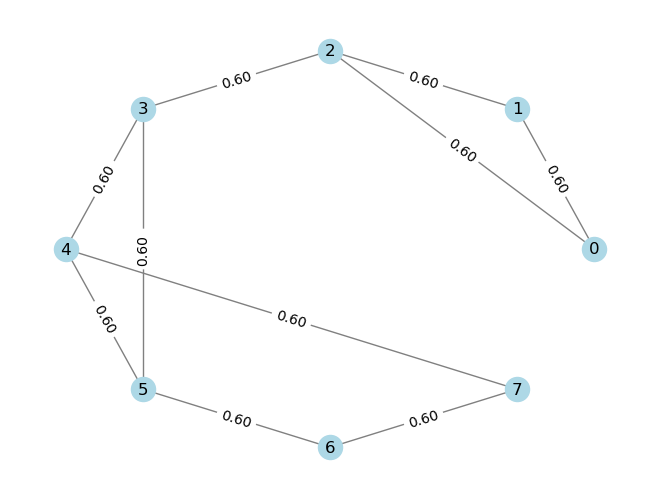

tensor(7.2000)
[[ 1.2       -0.6       -0.6       -0.        -0.        -0.
  -0.        -0.       ]
 [-0.6        1.2       -0.6       -0.        -0.        -0.
  -0.        -0.       ]
 [-0.6       -0.6        1.8000001 -0.6       -0.        -0.
  -0.        -0.       ]
 [-0.        -0.        -0.6        1.8000001 -0.6       -0.6
  -0.        -0.       ]
 [-0.        -0.        -0.        -0.6        1.8000001 -0.6
  -0.        -0.6      ]
 [-0.        -0.        -0.        -0.6       -0.6        1.8000001
  -0.6       -0.       ]
 [-0.        -0.        -0.        -0.        -0.        -0.6
   1.2       -0.6      ]
 [-0.        -0.        -0.        -0.        -0.6       -0.
  -0.6        1.2      ]]
tensor([[ 1.2000, -0.6000, -0.6000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.6000,  1.2000, -0.6000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.6000, -0.6000,  1.8000, -0.6000, -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.6000,  1.8

In [1]:
from GEM_module import GEM
from utils import *
from scipy.sparse.csgraph import laplacian

# seed
torch.manual_seed(42)
torch.random.manual_seed(42)

# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# generate synthetic data
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[4,5],[3,5],[5,6],[6,7], [4,7]]
edges = torch.tensor(edges)
weights = torch.tensor([0.6]*len(edges))
num_nodes = 8
adj = generate_graph_from_edges(num_nodes, edges, weights)
print(adj.norm()**2)
L = laplacian(adj.numpy(), normed=False)
print(L)
# generate data
sigma = 0.4
mu = sigma ** 2
n = 128
y = generate_y(num_nodes, sigma, L, n)

In [2]:
def Experiment(arg_dict, num_node, S_init=None, seed=42):
    mu = arg_dict['mu']
    gamma = arg_dict['gamma']
    step_size = arg_dict['step_size']
    PGD_step_size = arg_dict['PGD_step_size']
    c = arg_dict['c']
    PGD_iters = arg_dict['PGD_iters']
    use_block_coordinate = arg_dict['use_block_coordinate']
    torch.manual_seed(seed)
    torch.random.manual_seed(seed)
    gem = GEM(num_nodes, mu=mu, gamma=gamma, step_size=step_size, c=c, PGD_iters=PGD_iters, PGD_step_size=PGD_step_size, use_block_coordinate=use_block_coordinate, scale=True)
    torch.manual_seed(42)
    # initialize adjacency and S
    # adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
    if S_init is None:
        S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
 
    x_final, adj_final, S_final = gem(y, S_init, num_iters=7)
    W_final = adj_final * S_final
    print("Final learned mask:")
    print(S_final, S_final.norm()**2)
    print("Final learned adjacency matrix:")
    print(W_final, W_final.norm()**2)

# 6-node graph experiments - PGD (w/o BCD)
Settings: All random seed 42. 128 data points. Generating noise $\sigma=0.4$ (variance 0.16).

Testing parameters:
- GLR strength: $\mu=0.2, 0.1, 0.4$ (suitable, low, high)
- PGD step size $\eta=0.01, 0.02$ combined with iterations $N=100, 50$
- Sparsity control $\gamma=0.4, 0.2, 0.6$



Iteration 1/7
after E-step: delta_W norm 0.2371, GLR 11.6463, adj norm^2 15.7615
after M-step-1: delta_W norm 0.0667, GLR 11.4680, adj norm^2 15.8365
PGD iter 1/50, ||S_new - S||_F = 0.0737
PGD iter 21/50, ||S_new - S||_F = 0.0695
PGD iter 41/50, ||S_new - S||_F = 0.0633
tensor([[0.0000, 0.6589, 0.6877, 0.5705, 0.4634, 0.5588, 0.5322, 0.4951],
        [0.6589, 0.0000, 0.6802, 0.4979, 0.3958, 0.4497, 0.3872, 0.3185],
        [0.6877, 0.6802, 0.0000, 0.5971, 0.4565, 0.5542, 0.4939, 0.4159],
        [0.5705, 0.4979, 0.5971, 0.0000, 0.6918, 0.6503, 0.5659, 0.5837],
        [0.4634, 0.3958, 0.4565, 0.6918, 0.0000, 0.6465, 0.6326, 0.6576],
        [0.5588, 0.4497, 0.5542, 0.6503, 0.6465, 0.0000, 0.7230, 0.6508],
        [0.5322, 0.3872, 0.4939, 0.5659, 0.6326, 0.7230, 0.0000, 0.6812],
        [0.4951, 0.3185, 0.4159, 0.5837, 0.6576, 0.6508, 0.6812, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.3785, grad_fn=<PowBackward0>)


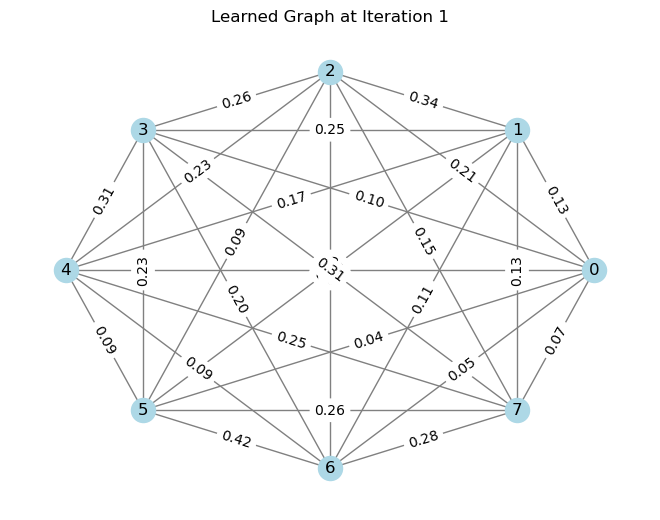

Iteration 2/7
after E-step: delta_W norm 0.0801, GLR 11.1298, adj norm^2 15.4833
after M-step-1: delta_W norm 0.1061, GLR 10.8970, adj norm^2 15.0172
PGD iter 1/50, ||S_new - S||_F = 0.1036
PGD iter 21/50, ||S_new - S||_F = 0.0972
PGD iter 41/50, ||S_new - S||_F = 0.0844
tensor([[0.0000, 0.6170, 0.6230, 0.4699, 0.2457, 0.4555, 0.4028, 0.3528],
        [0.6170, 0.0000, 0.6183, 0.2853, 0.1131, 0.1712, 0.0646, -0.0000],
        [0.6230, 0.6183, 0.0000, 0.4523, 0.1794, 0.3867, 0.2608, 0.1469],
        [0.4699, 0.2853, 0.4523, 0.0000, 0.6379, 0.5623, 0.4192, 0.4416],
        [0.2457, 0.1131, 0.1794, 0.6379, 0.0000, 0.6300, 0.5946, 0.5905],
        [0.4555, 0.1712, 0.3867, 0.5623, 0.6300, 0.0000, 0.6366, 0.5568],
        [0.4028, 0.0646, 0.2608, 0.4192, 0.5946, 0.6366, 0.0000, 0.6141],
        [0.3528, -0.0000, 0.1469, 0.4416, 0.5905, 0.5568, 0.6141, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(4.5085, grad_fn=<PowBackward0>)


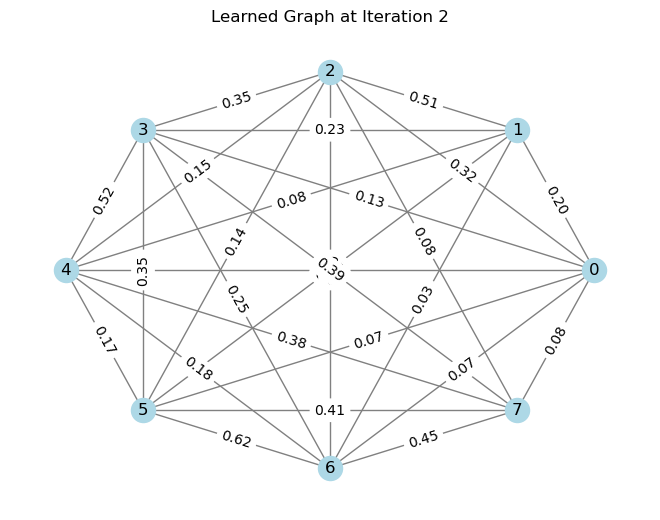

Iteration 3/7
after E-step: delta_W norm 0.1024, GLR 9.4697, adj norm^2 14.7942
after M-step-1: delta_W norm 0.1840, GLR 9.7653, adj norm^2 15.2966
PGD iter 1/50, ||S_new - S||_F = 0.1382
PGD iter 21/50, ||S_new - S||_F = 0.1288
PGD iter 41/50, ||S_new - S||_F = 0.0844
tensor([[0.0000, 0.5724, 0.5619, 0.3193, -0.0000, 0.3116, 0.2021, 0.0838],
        [0.5724, 0.0000, 0.5746, 0.0739, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.5619, 0.5746, 0.0000, 0.3461, -0.0000, 0.2685, 0.0810, -0.0000],
        [0.3193, 0.0739, 0.3461, 0.0000, 0.6068, 0.5341, 0.3428, 0.3327],
        [-0.0000, -0.0000, -0.0000, 0.6068, 0.0000, 0.6298, 0.5857, 0.5608],
        [0.3116, -0.0000, 0.2685, 0.5341, 0.6298, 0.0000, 0.6021, 0.5167],
        [0.2021, -0.0000, 0.0810, 0.3428, 0.5857, 0.6021, 0.0000, 0.5922],
        [0.0838, -0.0000, -0.0000, 0.3327, 0.5608, 0.5167, 0.5922, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(5.5167, grad_fn=<PowBackward0>)


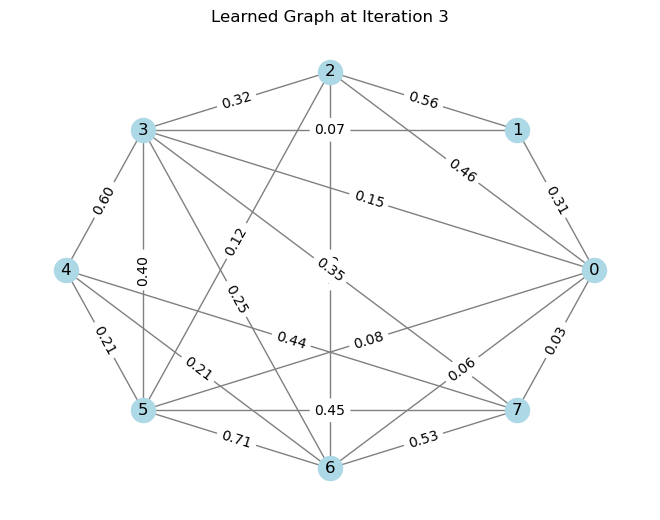

Iteration 4/7
after E-step: delta_W norm 0.1610, GLR 6.8965, adj norm^2 14.2169
after M-step-1: delta_W norm 0.1940, GLR 7.1239, adj norm^2 15.1931
PGD iter 1/50, ||S_new - S||_F = 0.1712
PGD iter 21/50, ||S_new - S||_F = 0.1576
PGD iter 41/50, ||S_new - S||_F = 0.0678
tensor([[0.0000, 0.5592, 0.5574, 0.2349, -0.0000, 0.2291, 0.0787, -0.0000],
        [0.5592, 0.0000, 0.5383, 0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.5574, 0.5383, 0.0000, 0.2460, -0.0000, 0.1923, -0.0000, -0.0000],
        [0.2349, 0.0000, 0.2460, 0.0000, 0.5659, 0.5111, 0.2724, 0.2346],
        [-0.0000, -0.0000, -0.0000, 0.5659, 0.0000, 0.6257, 0.5795, 0.5313],
        [0.2291, -0.0000, 0.1923, 0.5111, 0.6257, 0.0000, 0.5753, 0.4947],
        [0.0787, -0.0000, -0.0000, 0.2724, 0.5795, 0.5753, 0.0000, 0.5784],
        [-0.0000, -0.0000, -0.0000, 0.2346, 0.5313, 0.4947, 0.5784, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(6.0564, grad_fn=<PowBackward0>)


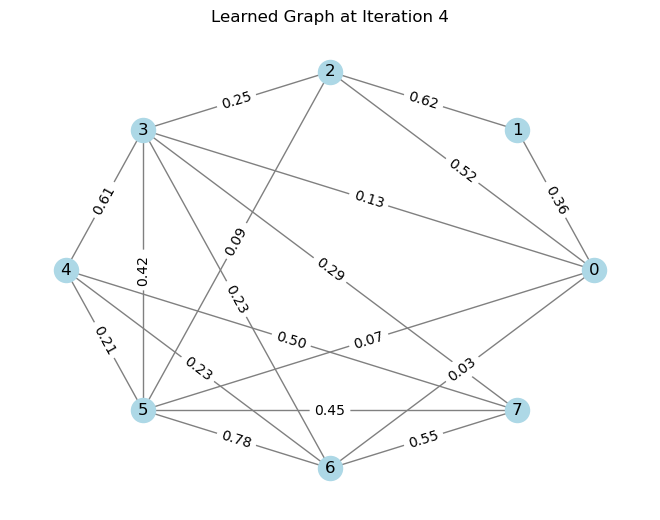

Iteration 5/7
after E-step: delta_W norm 0.1962, GLR 6.1035, adj norm^2 14.0496
after M-step-1: delta_W norm 0.1608, GLR 6.2637, adj norm^2 14.0834
PGD iter 1/50, ||S_new - S||_F = 0.1812
PGD iter 21/50, ||S_new - S||_F = 0.1665
PGD iter 41/50, ||S_new - S||_F = 0.0639
tensor([[0.0000, 0.5711, 0.5619, 0.2254, -0.0000, 0.1627, 0.0165, -0.0000],
        [0.5711, 0.0000, 0.5434, 0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.5619, 0.5434, 0.0000, 0.2000, 0.0000, 0.0690, -0.0000, -0.0000],
        [0.2254, 0.0000, 0.2000, 0.0000, 0.5444, 0.4807, 0.2272, 0.1989],
        [-0.0000, -0.0000, 0.0000, 0.5444, 0.0000, 0.6195, 0.5607, 0.5169],
        [0.1627, -0.0000, 0.0690, 0.4807, 0.6195, 0.0000, 0.5529, 0.4380],
        [0.0165, -0.0000, -0.0000, 0.2272, 0.5607, 0.5529, 0.0000, 0.5461],
        [-0.0000, -0.0000, -0.0000, 0.1989, 0.5169, 0.4380, 0.5461, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(6.3962, grad_fn=<PowBackward0>)


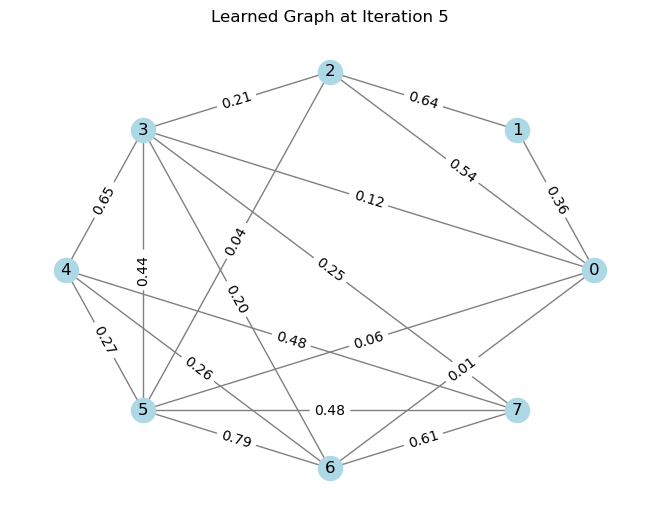

Iteration 6/7
after E-step: delta_W norm 0.1625, GLR 5.7412, adj norm^2 13.9862
after M-step-1: delta_W norm 0.1596, GLR 5.8355, adj norm^2 14.7297
PGD iter 1/50, ||S_new - S||_F = 0.1952
PGD iter 21/50, ||S_new - S||_F = 0.1772
PGD iter 41/50, ||S_new - S||_F = 0.0587
tensor([[0.0000e+00, 5.4953e-01, 5.4368e-01, 1.9167e-01, -0.0000e+00, 1.7045e-01,
         3.5956e-03, -0.0000e+00],
        [5.4953e-01, 0.0000e+00, 5.2048e-01, 3.8206e-04, 0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [5.4368e-01, 5.2048e-01, 0.0000e+00, 1.7461e-01, 0.0000e+00, 8.9239e-02,
         -0.0000e+00, -0.0000e+00],
        [1.9167e-01, 3.8206e-04, 1.7461e-01, 0.0000e+00, 5.4415e-01, 4.7064e-01,
         1.8668e-01, 1.3514e-01],
        [-0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4415e-01, 0.0000e+00, 6.2308e-01,
         5.6537e-01, 4.9787e-01],
        [1.7045e-01, -0.0000e+00, 8.9239e-02, 4.7064e-01, 6.2308e-01, 0.0000e+00,
         5.4082e-01, 4.5183e-01],
        [3.5956e-03, -0.0000e+0

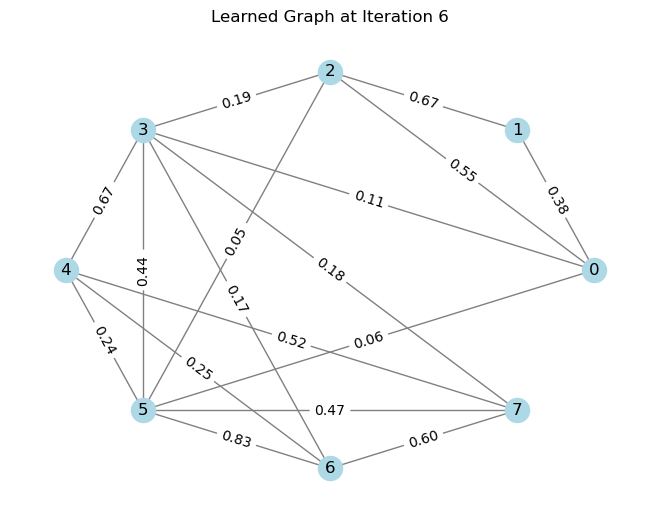

Iteration 7/7
after E-step: delta_W norm 0.1584, GLR 5.6499, adj norm^2 13.9494
after M-step-1: delta_W norm 0.1608, GLR 5.7584, adj norm^2 14.4258
PGD iter 1/50, ||S_new - S||_F = 0.1974
PGD iter 21/50, ||S_new - S||_F = 0.1793
PGD iter 41/50, ||S_new - S||_F = 0.0591
tensor([[0.0000, 0.5489, 0.5385, 0.1825, -0.0000, 0.1405, -0.0000, -0.0000],
        [0.5489, 0.0000, 0.5254, 0.0019, 0.0000, -0.0000, -0.0000, -0.0000],
        [0.5385, 0.5254, 0.0000, 0.1772, 0.0000, 0.0653, -0.0000, -0.0000],
        [0.1825, 0.0019, 0.1772, 0.0000, 0.5316, 0.4546, 0.1626, 0.1116],
        [-0.0000, 0.0000, 0.0000, 0.5316, 0.0000, 0.6190, 0.5561, 0.4922],
        [0.1405, -0.0000, 0.0653, 0.4546, 0.6190, 0.0000, 0.5334, 0.4268],
        [-0.0000, -0.0000, -0.0000, 0.1626, 0.5561, 0.5334, 0.0000, 0.5395],
        [-0.0000, -0.0000, -0.0000, 0.1116, 0.4922, 0.4268, 0.5395, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 7 tensor(6.7364, grad_fn=<PowBackward0>)


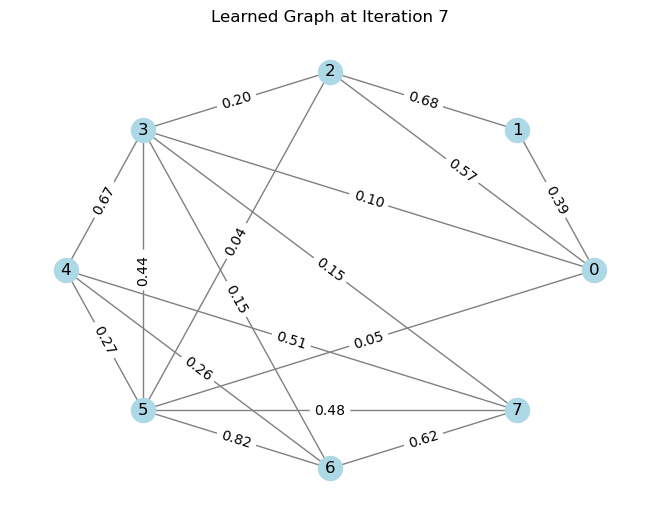

Final learned mask:
tensor([[0.0000, 0.5489, 0.5385, 0.1825, -0.0000, 0.1405, -0.0000, -0.0000],
        [0.5489, 0.0000, 0.5254, 0.0019, 0.0000, -0.0000, -0.0000, -0.0000],
        [0.5385, 0.5254, 0.0000, 0.1772, 0.0000, 0.0653, -0.0000, -0.0000],
        [0.1825, 0.0019, 0.1772, 0.0000, 0.5316, 0.4546, 0.1626, 0.1116],
        [-0.0000, 0.0000, 0.0000, 0.5316, 0.0000, 0.6190, 0.5561, 0.4922],
        [0.1405, -0.0000, 0.0653, 0.4546, 0.6190, 0.0000, 0.5334, 0.4268],
        [-0.0000, -0.0000, -0.0000, 0.1626, 0.5561, 0.5334, 0.0000, 0.5395],
        [-0.0000, -0.0000, -0.0000, 0.1116, 0.4922, 0.4268, 0.5395, 0.0000]],
       grad_fn=<CopySlices>) tensor(6.3533, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.3901, 0.5670, 0.1040, -0.0000, 0.0501, -0.0000, -0.0000],
        [0.3901, 0.0000, 0.6777, 0.0022, 0.0000, -0.0000, -0.0000, -0.0000],
        [0.5670, 0.6777, 0.0000, 0.1980, 0.0000, 0.0376, -0.0000, -0.0000],
        [0.1040, 0.0022, 0.1980, 0.0000, 

In [3]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.2371, GLR 11.6463, adj norm^2 15.7615
after M-step-1: delta_W norm 0.0667, GLR 11.4680, adj norm^2 15.8365
PGD iter 1/50, ||S_new - S||_F = 0.1474
PGD iter 21/50, ||S_new - S||_F = 0.1265
PGD iter 41/50, ||S_new - S||_F = 0.0798
tensor([[0.0000, 0.4520, 0.5357, 0.2475, 0.1282, 0.1799, 0.1380, 0.1041],
        [0.4520, 0.0000, 0.5634, 0.2613, 0.0866, 0.0966, 0.0000, 0.0000],
        [0.5357, 0.5634, 0.0000, 0.3646, 0.1809, 0.2005, 0.1037, 0.0417],
        [0.2475, 0.2613, 0.3646, 0.0000, 0.5316, 0.4221, 0.2726, 0.3562],
        [0.1282, 0.0866, 0.1809, 0.5316, 0.0000, 0.3554, 0.3404, 0.4734],
        [0.1799, 0.0966, 0.2005, 0.4221, 0.3554, 0.0000, 0.6012, 0.4408],
        [0.1380, 0.0000, 0.1037, 0.2726, 0.3404, 0.6012, 0.0000, 0.5088],
        [0.1041, 0.0000, 0.0417, 0.3562, 0.4734, 0.4408, 0.5088, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.0536, grad_fn=<PowBackward0>)


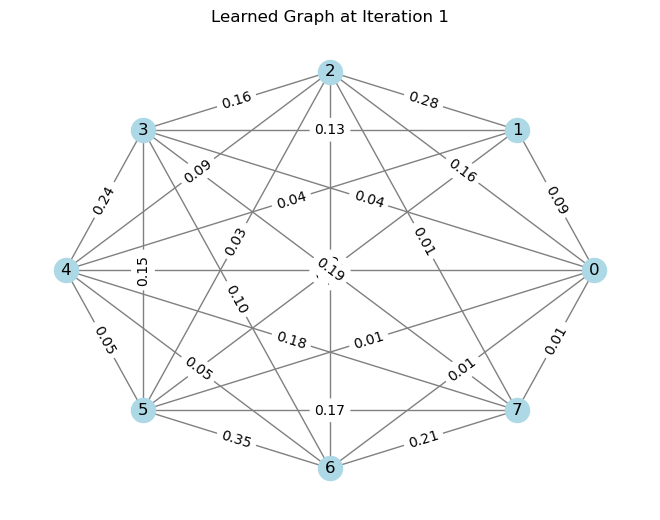

Iteration 2/7
after E-step: delta_W norm 0.0897, GLR 8.2142, adj norm^2 14.6312
after M-step-1: delta_W norm 0.1884, GLR 8.2455, adj norm^2 14.4585
PGD iter 1/50, ||S_new - S||_F = 0.3235
PGD iter 21/50, ||S_new - S||_F = 0.1438
PGD iter 41/50, ||S_new - S||_F = 0.0265
tensor([[0.0000, 0.3799, 0.4104, 0.0365, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3799, 0.0000, 0.4634, 0.0939, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4104, 0.4634, 0.0000, 0.3219, 0.0346, 0.0000, 0.0000, 0.0000],
        [0.0365, 0.0939, 0.3219, 0.0000, 0.4771, 0.3053, 0.0000, 0.1025],
        [0.0000, 0.0000, 0.0346, 0.4771, 0.0000, 0.3656, 0.2739, 0.3336],
        [0.0000, 0.0000, 0.0000, 0.3053, 0.3656, 0.0000, 0.4452, 0.2255],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2739, 0.4452, 0.0000, 0.3979],
        [0.0000, 0.0000, 0.0000, 0.1025, 0.3336, 0.2255, 0.3979, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.7760, grad_fn=<PowBackward0>)


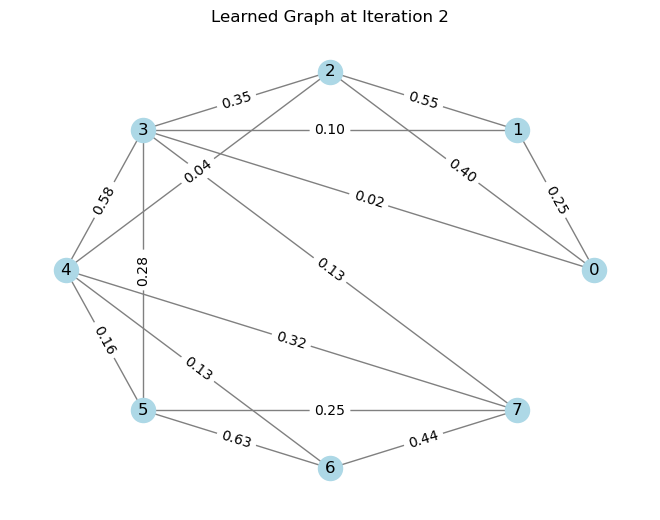

Iteration 3/7
after E-step: delta_W norm 0.1735, GLR 5.6340, adj norm^2 13.9999
after M-step-1: delta_W norm 0.1507, GLR 5.6833, adj norm^2 14.5793
PGD iter 1/50, ||S_new - S||_F = 0.4827
PGD iter 21/50, ||S_new - S||_F = 0.1048
PGD iter 41/50, ||S_new - S||_F = 0.0218
tensor([[0.0000, 0.3249, 0.3666, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3249, 0.0000, 0.3657, 0.0471, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3666, 0.3657, 0.0000, 0.2872, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0471, 0.2872, 0.0000, 0.4082, 0.2401, 0.0000, 0.0412],
        [0.0000, 0.0000, 0.0000, 0.4082, 0.0000, 0.3628, 0.2142, 0.2704],
        [0.0000, 0.0000, 0.0000, 0.2401, 0.3628, 0.0000, 0.3502, 0.1238],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2142, 0.3502, 0.0000, 0.3442],
        [0.0000, 0.0000, 0.0000, 0.0412, 0.2704, 0.1238, 0.3442, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.7052, grad_fn=<PowBackward0>)


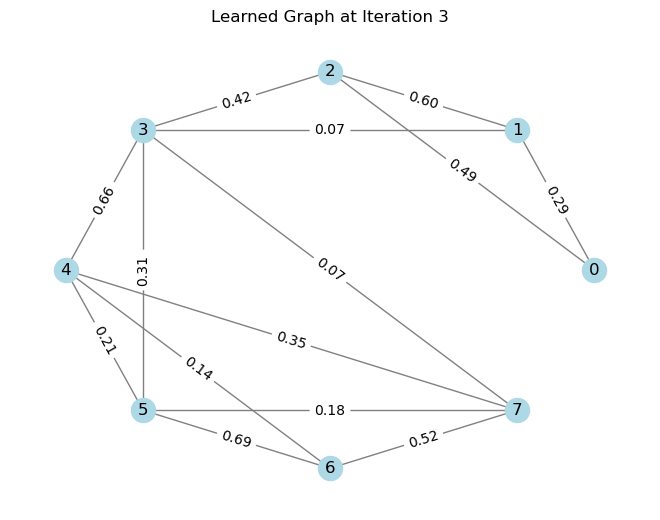

Iteration 4/7
after E-step: delta_W norm 0.1533, GLR 5.3073, adj norm^2 13.8798
after M-step-1: delta_W norm 0.1402, GLR 5.3426, adj norm^2 14.4006
PGD iter 1/50, ||S_new - S||_F = 0.5834
PGD iter 21/50, ||S_new - S||_F = 0.0858
PGD iter 41/50, ||S_new - S||_F = 0.0190
tensor([[0.0000, 0.2840, 0.3350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2840, 0.0000, 0.3141, 0.0298, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.3350, 0.3141, 0.0000, 0.2532, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0298, 0.2532, 0.0000, 0.3508, 0.2031, 0.0000, 0.0324],
        [0.0000, 0.0000, 0.0000, 0.3508, 0.0000, 0.3634, 0.1759, 0.2263],
        [0.0000, 0.0000, 0.0000, 0.2031, 0.3634, 0.0000, 0.3073, 0.0726],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.1759, 0.3073, 0.0000, 0.3204],
        [0.0000, 0.0000, 0.0000, 0.0324, 0.2263, 0.0726, 0.3204, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(5.3735, grad_fn=<PowBackward0>)


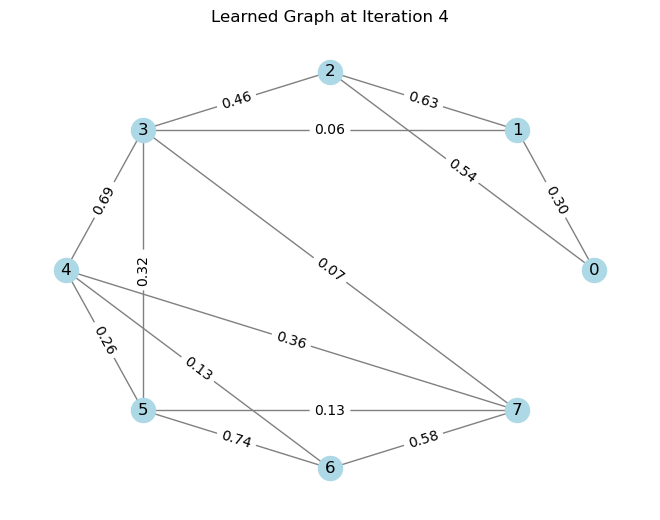

Iteration 5/7
after E-step: delta_W norm 0.1418, GLR 5.2220, adj norm^2 13.8401
after M-step-1: delta_W norm 0.1262, GLR 5.2510, adj norm^2 14.3088
PGD iter 1/50, ||S_new - S||_F = 0.6594
PGD iter 21/50, ||S_new - S||_F = 0.0798
PGD iter 41/50, ||S_new - S||_F = 0.0180
tensor([[0.0000, 0.2574, 0.3152, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2574, 0.0000, 0.2853, 0.0212, -0.0000, 0.0000, -0.0000, 0.0000],
        [0.3152, 0.2853, 0.0000, 0.2312, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0212, 0.2312, 0.0000, 0.3175, 0.1808, 0.0000, 0.0283],
        [0.0000, -0.0000, 0.0000, 0.3175, 0.0000, 0.3640, 0.1463, 0.2021],
        [0.0000, 0.0000, 0.0000, 0.1808, 0.3640, 0.0000, 0.2840, 0.0488],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.1463, 0.2840, 0.0000, 0.3062],
        [0.0000, 0.0000, -0.0000, 0.0283, 0.2021, 0.0488, 0.3062, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(5.9221, grad_fn=<PowBackward0>)


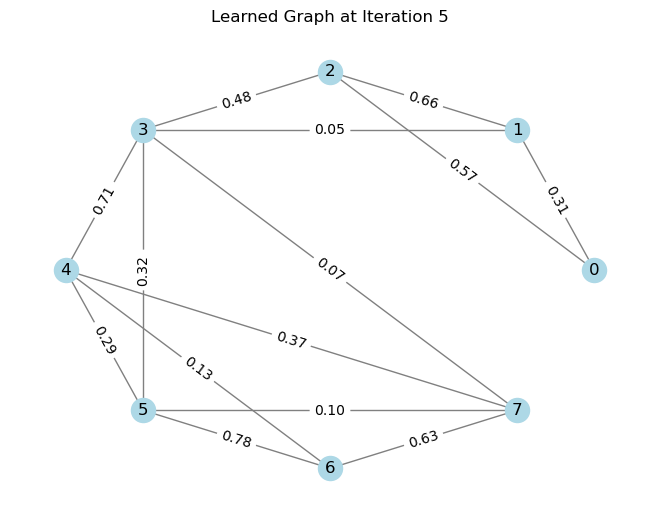

Iteration 6/7
after E-step: delta_W norm 0.1269, GLR 5.1553, adj norm^2 13.8150
after M-step-1: delta_W norm 0.1153, GLR 5.1816, adj norm^2 14.2239
PGD iter 1/50, ||S_new - S||_F = 0.7135
PGD iter 21/50, ||S_new - S||_F = 0.0766
PGD iter 41/50, ||S_new - S||_F = 0.0176
tensor([[0.0000, 0.2404, 0.3025, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2404, 0.0000, 0.2693, 0.0165, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.3025, 0.2693, 0.0000, 0.2174, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0165, 0.2174, 0.0000, 0.2981, 0.1676, 0.0000, 0.0251],
        [0.0000, -0.0000, 0.0000, 0.2981, 0.0000, 0.3641, 0.1244, 0.1897],
        [0.0000, 0.0000, 0.0000, 0.1676, 0.3641, 0.0000, 0.2701, 0.0370],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.1244, 0.2701, 0.0000, 0.2962],
        [0.0000, -0.0000, -0.0000, 0.0251, 0.1897, 0.0370, 0.2962, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 6 tensor(6.2966, grad_fn=<PowBackward0>)


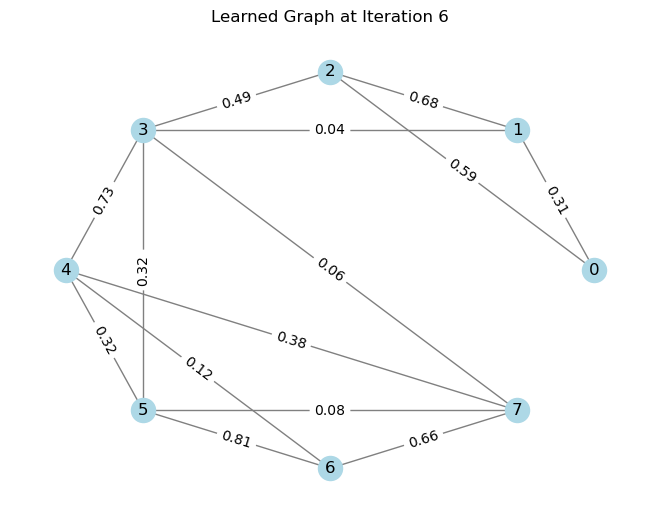

Iteration 7/7
after E-step: delta_W norm 0.1157, GLR 5.1065, adj norm^2 13.7982
after M-step-1: delta_W norm 0.1087, GLR 5.1317, adj norm^2 14.1557
PGD iter 1/50, ||S_new - S||_F = 0.7504
PGD iter 21/50, ||S_new - S||_F = 0.0728
PGD iter 41/50, ||S_new - S||_F = 0.0174
tensor([[0.0000, 0.2293, 0.2942, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2293, 0.0000, 0.2599, 0.0138, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.2942, 0.2599, 0.0000, 0.2089, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0138, 0.2089, 0.0000, 0.2867, 0.1600, 0.0000, 0.0228],
        [0.0000, -0.0000, -0.0000, 0.2867, 0.0000, 0.3642, 0.1090, 0.1833],
        [0.0000, 0.0000, 0.0000, 0.1600, 0.3642, 0.0000, 0.2614, 0.0308],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.1090, 0.2614, 0.0000, 0.2891],
        [0.0000, -0.0000, -0.0000, 0.0228, 0.1833, 0.0308, 0.2891, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 7 tensor(6.5446, grad_fn=<PowBackward0>)


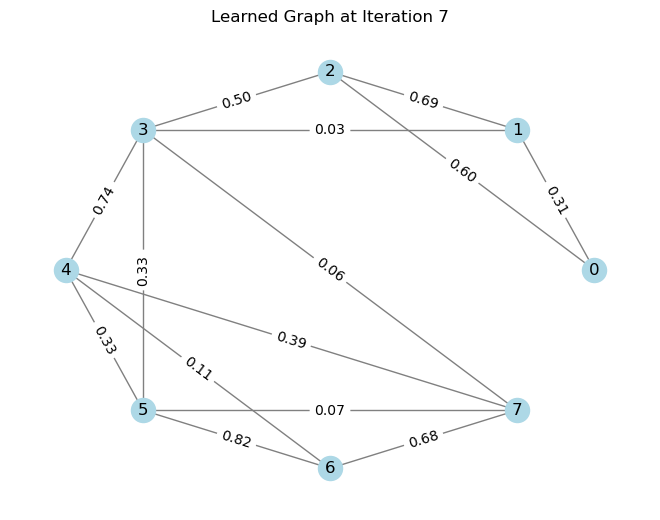

Final learned mask:
tensor([[0.0000, 0.2293, 0.2942, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2293, 0.0000, 0.2599, 0.0138, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.2942, 0.2599, 0.0000, 0.2089, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0138, 0.2089, 0.0000, 0.2867, 0.1600, 0.0000, 0.0228],
        [0.0000, -0.0000, -0.0000, 0.2867, 0.0000, 0.3642, 0.1090, 0.1833],
        [0.0000, 0.0000, 0.0000, 0.1600, 0.3642, 0.0000, 0.2614, 0.0308],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.1090, 0.2614, 0.0000, 0.2891],
        [0.0000, -0.0000, -0.0000, 0.0228, 0.1833, 0.0308, 0.2891, 0.0000]],
       grad_fn=<CopySlices>) tensor(1.3796, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.3112, 0.6011, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.3112, 0.0000, 0.6942, 0.0338, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.6011, 0.6942, 0.0000, 0.4988, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0338, 0.4988, 0.0000, 0.7

In [4]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.2371, GLR 11.6463, adj norm^2 15.7615
after M-step-1: delta_W norm 0.0667, GLR 11.4680, adj norm^2 15.8365
PGD iter 1/50, ||S_new - S||_F = 0.0368
PGD iter 21/50, ||S_new - S||_F = 0.0359
PGD iter 41/50, ||S_new - S||_F = 0.0347
tensor([[0.0000, 0.8193, 0.8305, 0.7774, 0.7178, 0.7750, 0.7611, 0.7400],
        [0.8193, 0.0000, 0.8237, 0.7317, 0.6799, 0.7131, 0.6810, 0.6416],
        [0.8305, 0.8237, 0.0000, 0.7855, 0.7097, 0.7707, 0.7393, 0.6947],
        [0.7774, 0.7317, 0.7855, 0.0000, 0.8329, 0.8148, 0.7718, 0.7768],
        [0.7178, 0.6799, 0.7097, 0.8329, 0.0000, 0.8181, 0.8104, 0.8160],
        [0.7750, 0.7131, 0.7707, 0.8148, 0.8181, 0.0000, 0.8464, 0.8134],
        [0.7611, 0.6810, 0.7393, 0.7718, 0.8104, 0.8464, 0.0000, 0.8280],
        [0.7400, 0.6416, 0.6947, 0.7768, 0.8160, 0.8134, 0.8280, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(4.1870, grad_fn=<PowBackward0>)


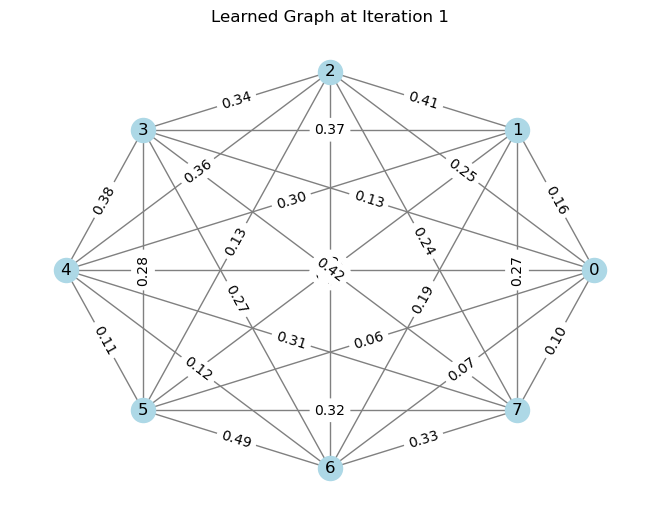

Iteration 2/7
after E-step: delta_W norm 0.0728, GLR 11.6119, adj norm^2 15.7086
after M-step-1: delta_W norm 0.1048, GLR 11.3866, adj norm^2 15.3030
PGD iter 1/50, ||S_new - S||_F = 0.0425
PGD iter 21/50, ||S_new - S||_F = 0.0414
PGD iter 41/50, ||S_new - S||_F = 0.0400
tensor([[0.0000, 0.8079, 0.8139, 0.7574, 0.6789, 0.7512, 0.7331, 0.7164],
        [0.8079, 0.0000, 0.8058, 0.6890, 0.6300, 0.6473, 0.6091, 0.5790],
        [0.8139, 0.8058, 0.0000, 0.7511, 0.6518, 0.7271, 0.6815, 0.6396],
        [0.7574, 0.6890, 0.7511, 0.0000, 0.8194, 0.7903, 0.7358, 0.7466],
        [0.6789, 0.6300, 0.6518, 0.8194, 0.0000, 0.8128, 0.7993, 0.7987],
        [0.7512, 0.6473, 0.7271, 0.7903, 0.8128, 0.0000, 0.8209, 0.7884],
        [0.7331, 0.6091, 0.6815, 0.7358, 0.7993, 0.8209, 0.0000, 0.8088],
        [0.7164, 0.5790, 0.6396, 0.7466, 0.7987, 0.7884, 0.8088, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(6.4178, grad_fn=<PowBackward0>)


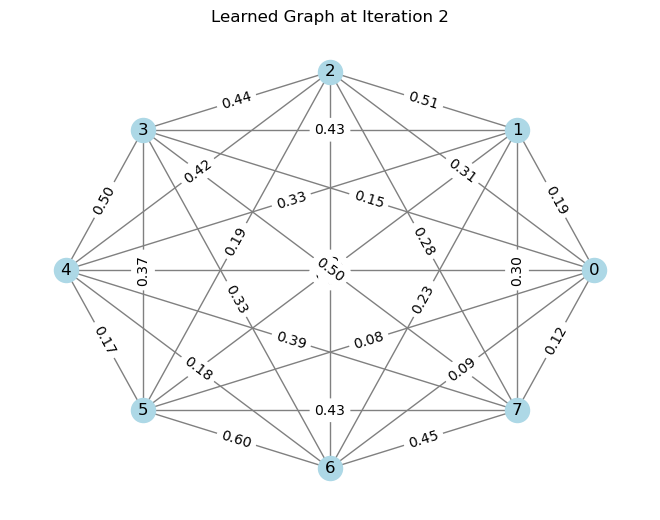

Iteration 3/7
after E-step: delta_W norm 0.1039, GLR 11.5585, adj norm^2 15.6439
after M-step-1: delta_W norm 0.0950, GLR 11.6548, adj norm^2 15.6416
PGD iter 1/50, ||S_new - S||_F = 0.0444
PGD iter 21/50, ||S_new - S||_F = 0.0432
PGD iter 41/50, ||S_new - S||_F = 0.0418
tensor([[0.0000, 0.7965, 0.7975, 0.7321, 0.6337, 0.7320, 0.7075, 0.6777],
        [0.7965, 0.0000, 0.7998, 0.6744, 0.6107, 0.6387, 0.5981, 0.5571],
        [0.7975, 0.7998, 0.0000, 0.7461, 0.6411, 0.7271, 0.6793, 0.6265],
        [0.7321, 0.6744, 0.7461, 0.0000, 0.8163, 0.7908, 0.7343, 0.7391],
        [0.6337, 0.6107, 0.6411, 0.8163, 0.0000, 0.8126, 0.7993, 0.7957],
        [0.7320, 0.6387, 0.7271, 0.7908, 0.8126, 0.0000, 0.8196, 0.7877],
        [0.7075, 0.5981, 0.6793, 0.7343, 0.7993, 0.8196, 0.0000, 0.8085],
        [0.6777, 0.5571, 0.6265, 0.7391, 0.7957, 0.7877, 0.8085, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(6.8492, grad_fn=<PowBackward0>)


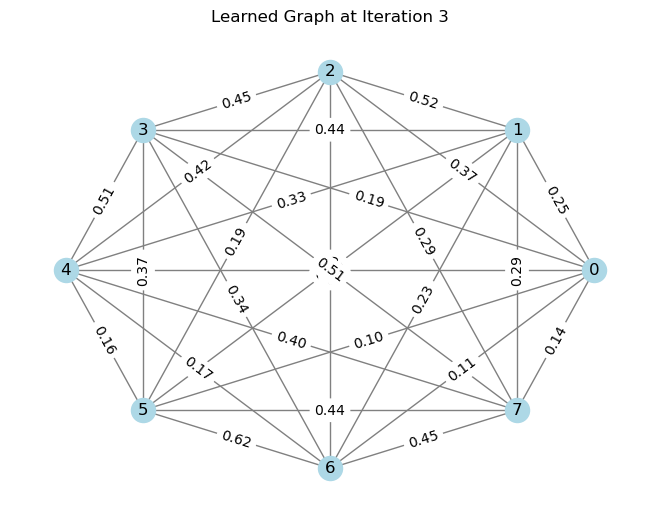

Iteration 4/7
after E-step: delta_W norm 0.0914, GLR 11.3814, adj norm^2 15.6377
after M-step-1: delta_W norm 0.0770, GLR 11.3524, adj norm^2 15.9776
PGD iter 1/50, ||S_new - S||_F = 0.0444
PGD iter 21/50, ||S_new - S||_F = 0.0433
PGD iter 41/50, ||S_new - S||_F = 0.0418
tensor([[0.0000, 0.8014, 0.8064, 0.7409, 0.6429, 0.7426, 0.7194, 0.6832],
        [0.8014, 0.0000, 0.7983, 0.6664, 0.5922, 0.6459, 0.6002, 0.5375],
        [0.8064, 0.7983, 0.0000, 0.7462, 0.6326, 0.7372, 0.6902, 0.6155],
        [0.7409, 0.6664, 0.7462, 0.0000, 0.8145, 0.7914, 0.7325, 0.7333],
        [0.6429, 0.5922, 0.6326, 0.8145, 0.0000, 0.8122, 0.7995, 0.7933],
        [0.7426, 0.6459, 0.7372, 0.7914, 0.8122, 0.0000, 0.8212, 0.7897],
        [0.7194, 0.6002, 0.6902, 0.7325, 0.7995, 0.8212, 0.0000, 0.8087],
        [0.6832, 0.5375, 0.6155, 0.7333, 0.7933, 0.7897, 0.8087, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(6.9545, grad_fn=<PowBackward0>)


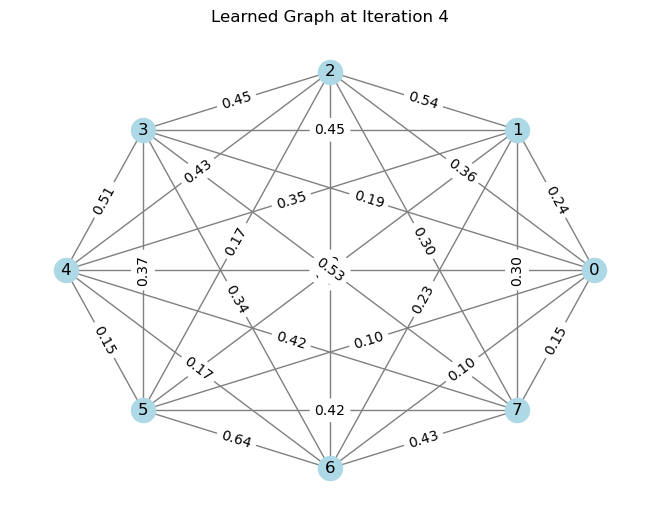

Iteration 5/7
after E-step: delta_W norm 0.0777, GLR 11.4440, adj norm^2 15.6441
after M-step-1: delta_W norm 0.3178, GLR 10.9344, adj norm^2 15.0571
PGD iter 1/50, ||S_new - S||_F = 0.0436
PGD iter 21/50, ||S_new - S||_F = 0.0425
PGD iter 41/50, ||S_new - S||_F = 0.0410
tensor([[0.0000, 0.8141, 0.8258, 0.7735, 0.7007, 0.7637, 0.7486, 0.7408],
        [0.8141, 0.0000, 0.8026, 0.6744, 0.6181, 0.6145, 0.5717, 0.5589],
        [0.8258, 0.8026, 0.0000, 0.7435, 0.6350, 0.7086, 0.6562, 0.6343],
        [0.7735, 0.6744, 0.7435, 0.0000, 0.8163, 0.7820, 0.7205, 0.7396],
        [0.7007, 0.6181, 0.6350, 0.8163, 0.0000, 0.8121, 0.7962, 0.7974],
        [0.7637, 0.6145, 0.7086, 0.7820, 0.8121, 0.0000, 0.8116, 0.7770],
        [0.7486, 0.5717, 0.6562, 0.7205, 0.7962, 0.8116, 0.0000, 0.8007],
        [0.7408, 0.5589, 0.6343, 0.7396, 0.7974, 0.7770, 0.8007, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(6.9853, grad_fn=<PowBackward0>)


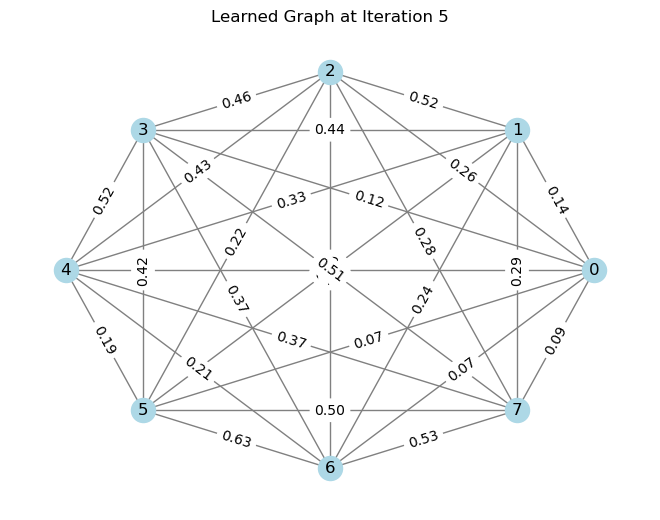

Iteration 6/7
after E-step: delta_W norm 0.3153, GLR 11.7314, adj norm^2 15.5950
after M-step-1: delta_W norm 0.5261, GLR 10.2275, adj norm^2 11.6557
PGD iter 1/50, ||S_new - S||_F = 0.0419
PGD iter 21/50, ||S_new - S||_F = 0.0408
PGD iter 41/50, ||S_new - S||_F = 0.0394
tensor([[0.0000, 0.8203, 0.8305, 0.7797, 0.7303, 0.7841, 0.7752, 0.7673],
        [0.8203, 0.0000, 0.8010, 0.6928, 0.6213, 0.6473, 0.6155, 0.5999],
        [0.8305, 0.8010, 0.0000, 0.7350, 0.6220, 0.7019, 0.6615, 0.6321],
        [0.7797, 0.6928, 0.7350, 0.0000, 0.8091, 0.7892, 0.7387, 0.7444],
        [0.7303, 0.6213, 0.6220, 0.8091, 0.0000, 0.8147, 0.7954, 0.7900],
        [0.7841, 0.6473, 0.7019, 0.7892, 0.8147, 0.0000, 0.8196, 0.7839],
        [0.7752, 0.6155, 0.6615, 0.7387, 0.7954, 0.8196, 0.0000, 0.8116],
        [0.7673, 0.5999, 0.6321, 0.7444, 0.7900, 0.7839, 0.8116, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 6 tensor(7.0702, grad_fn=<PowBackward0>)


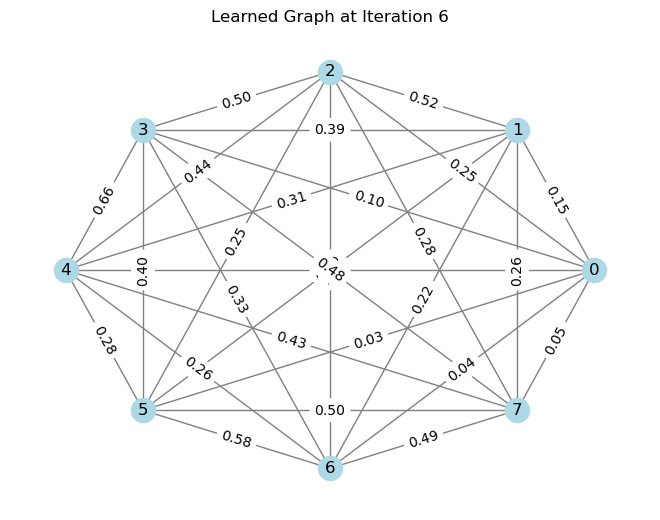

Iteration 7/7
after E-step: delta_W norm 0.5227, GLR 12.3272, adj norm^2 15.4647
after M-step-1: delta_W norm 1.0142, GLR 9.1818, adj norm^2 5.9332
PGD iter 1/50, ||S_new - S||_F = 0.0387
PGD iter 21/50, ||S_new - S||_F = 0.0377
PGD iter 41/50, ||S_new - S||_F = 0.0365
tensor([[0.0000, 0.8236, 0.8311, 0.7695, 0.7369, 0.7830, 0.7837, 0.7765],
        [0.8236, 0.0000, 0.8168, 0.7241, 0.6556, 0.6905, 0.7241, 0.6580],
        [0.8311, 0.8168, 0.0000, 0.7431, 0.6513, 0.7189, 0.7259, 0.6672],
        [0.7695, 0.7241, 0.7431, 0.0000, 0.7988, 0.7791, 0.7425, 0.7406],
        [0.7369, 0.6556, 0.6513, 0.7988, 0.0000, 0.8158, 0.7973, 0.7869],
        [0.7830, 0.6905, 0.7189, 0.7791, 0.8158, 0.0000, 0.8256, 0.7878],
        [0.7837, 0.7241, 0.7259, 0.7425, 0.7973, 0.8256, 0.0000, 0.8200],
        [0.7765, 0.6580, 0.6672, 0.7406, 0.7869, 0.7878, 0.8200, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 7 tensor(7.0981, grad_fn=<PowBackward0>)


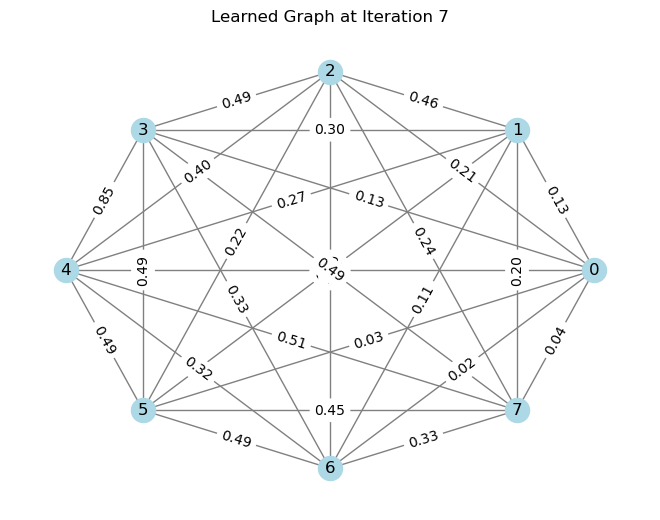

Final learned mask:
tensor([[0.0000, 0.8236, 0.8311, 0.7695, 0.7369, 0.7830, 0.7837, 0.7765],
        [0.8236, 0.0000, 0.8168, 0.7241, 0.6556, 0.6905, 0.7241, 0.6580],
        [0.8311, 0.8168, 0.0000, 0.7431, 0.6513, 0.7189, 0.7259, 0.6672],
        [0.7695, 0.7241, 0.7431, 0.0000, 0.7988, 0.7791, 0.7425, 0.7406],
        [0.7369, 0.6556, 0.6513, 0.7988, 0.0000, 0.8158, 0.7973, 0.7869],
        [0.7830, 0.6905, 0.7189, 0.7791, 0.8158, 0.0000, 0.8256, 0.7878],
        [0.7837, 0.7241, 0.7259, 0.7425, 0.7973, 0.8256, 0.0000, 0.8200],
        [0.7765, 0.6580, 0.6672, 0.7406, 0.7869, 0.7878, 0.8200, 0.0000]],
       grad_fn=<CopySlices>) tensor(32.1898, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.1321, 0.2091, 0.1312, 0.1229, 0.0328, 0.0249, 0.0365],
        [0.1321, 0.0000, 0.4566, 0.3004, 0.2656, 0.1875, 0.1124, 0.2047],
        [0.2091, 0.4566, 0.0000, 0.4921, 0.3980, 0.2180, 0.1391, 0.2422],
        [0.1312, 0.3004, 0.4921, 0.0000, 0.8494, 0.4915, 0.3299,

In [5]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.01
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.2371, GLR 11.6463, adj norm^2 15.7615
after M-step-1: delta_W norm 0.0667, GLR 11.4680, adj norm^2 15.8365
PGD iter 1/100, ||S_new - S||_F = 0.0737
PGD iter 21/100, ||S_new - S||_F = 0.0695
PGD iter 41/100, ||S_new - S||_F = 0.0633
PGD iter 61/100, ||S_new - S||_F = 0.0540
PGD iter 81/100, ||S_new - S||_F = 0.0402
tensor([[0.0000, 0.4534, 0.5375, 0.2489, 0.1305, 0.1807, 0.1390, 0.1055],
        [0.4534, 0.0000, 0.5649, 0.2632, 0.0886, 0.0985, 0.0000, 0.0000],
        [0.5375, 0.5649, 0.0000, 0.3663, 0.1831, 0.2016, 0.1051, 0.0438],
        [0.2489, 0.2632, 0.3663, 0.0000, 0.5330, 0.4235, 0.2742, 0.3581],
        [0.1305, 0.0886, 0.1831, 0.5330, 0.0000, 0.3562, 0.3412, 0.4750],
        [0.1807, 0.0985, 0.2016, 0.4235, 0.3562, 0.0000, 0.6028, 0.4423],
        [0.1390, 0.0000, 0.1051, 0.2742, 0.3412, 0.6028, 0.0000, 0.5104],
        [0.1055, 0.0000, 0.0438, 0.3581, 0.4750, 0.4423, 0.5104, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iterati

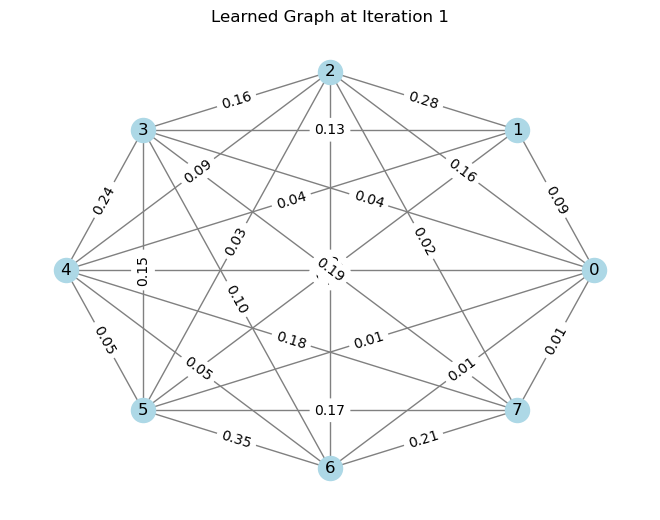

Iteration 2/7
after E-step: delta_W norm 0.0897, GLR 8.2351, adj norm^2 14.6369
after M-step-1: delta_W norm 0.1873, GLR 8.2637, adj norm^2 14.4584
PGD iter 1/100, ||S_new - S||_F = 0.1611
PGD iter 21/100, ||S_new - S||_F = 0.1493
PGD iter 41/100, ||S_new - S||_F = 0.0722
PGD iter 61/100, ||S_new - S||_F = 0.0312
PGD iter 81/100, ||S_new - S||_F = 0.0135
tensor([[0.0000, 0.3820, 0.4127, 0.0385, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3820, 0.0000, 0.4656, 0.0938, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4127, 0.4656, 0.0000, 0.3225, 0.0347, 0.0000, 0.0000, 0.0000],
        [0.0385, 0.0938, 0.3225, 0.0000, 0.4792, 0.3066, 0.0000, 0.1032],
        [0.0000, 0.0000, 0.0347, 0.4792, 0.0000, 0.3668, 0.2756, 0.3356],
        [0.0000, 0.0000, 0.0000, 0.3066, 0.3668, 0.0000, 0.4472, 0.2278],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2756, 0.4472, 0.0000, 0.3998],
        [0.0000, 0.0000, 0.0000, 0.1032, 0.3356, 0.2278, 0.3998, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

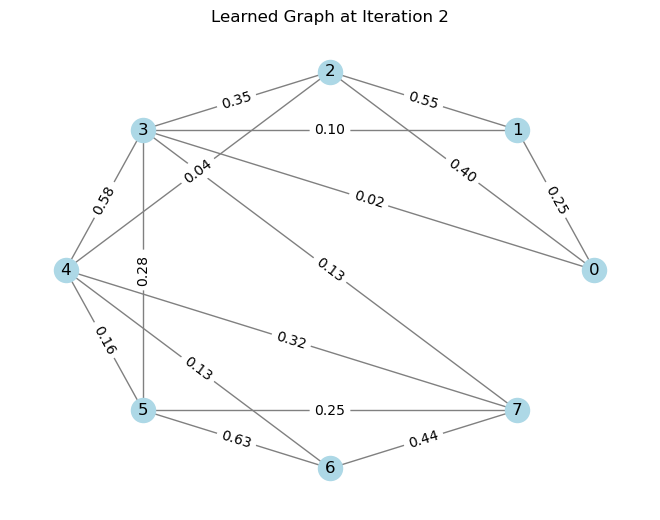

Iteration 3/7
after E-step: delta_W norm 0.1724, GLR 5.6344, adj norm^2 14.0000
after M-step-1: delta_W norm 0.1504, GLR 5.6841, adj norm^2 14.5787
PGD iter 1/100, ||S_new - S||_F = 0.2404
PGD iter 21/100, ||S_new - S||_F = 0.1792
PGD iter 41/100, ||S_new - S||_F = 0.0540
PGD iter 61/100, ||S_new - S||_F = 0.0208
PGD iter 81/100, ||S_new - S||_F = 0.0112
tensor([[0.0000, 0.3273, 0.3684, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3273, 0.0000, 0.3683, 0.0470, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3684, 0.3683, 0.0000, 0.2882, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0470, 0.2882, 0.0000, 0.4106, 0.2422, 0.0000, 0.0397],
        [0.0000, 0.0000, 0.0000, 0.4106, 0.0000, 0.3638, 0.2166, 0.2732],
        [0.0000, 0.0000, 0.0000, 0.2422, 0.3638, 0.0000, 0.3519, 0.1257],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2166, 0.3519, 0.0000, 0.3460],
        [0.0000, 0.0000, 0.0000, 0.0397, 0.2732, 0.1257, 0.3460, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

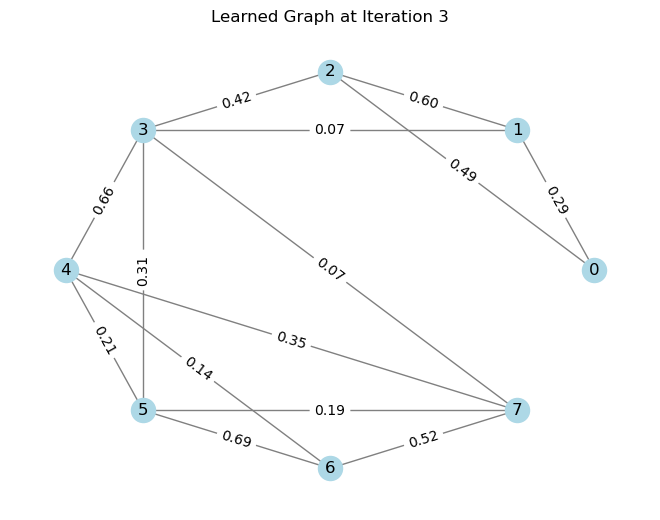

Iteration 4/7
after E-step: delta_W norm 0.1529, GLR 5.3030, adj norm^2 13.8785
after M-step-1: delta_W norm 0.1403, GLR 5.3387, adj norm^2 14.4002
PGD iter 1/100, ||S_new - S||_F = 0.2902
PGD iter 21/100, ||S_new - S||_F = 0.1550
PGD iter 41/100, ||S_new - S||_F = 0.0436
PGD iter 61/100, ||S_new - S||_F = 0.0177
PGD iter 81/100, ||S_new - S||_F = 0.0097
tensor([[0.0000, 0.2863, 0.3364, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2863, 0.0000, 0.3162, 0.0298, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.3364, 0.3162, 0.0000, 0.2545, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0298, 0.2545, 0.0000, 0.3531, 0.2050, 0.0000, 0.0311],
        [0.0000, 0.0000, 0.0000, 0.3531, 0.0000, 0.3644, 0.1788, 0.2287],
        [0.0000, 0.0000, 0.0000, 0.2050, 0.3644, 0.0000, 0.3085, 0.0735],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.1788, 0.3085, 0.0000, 0.3220],
        [0.0000, 0.0000, 0.0000, 0.0311, 0.2287, 0.0735, 0.3220, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Itera

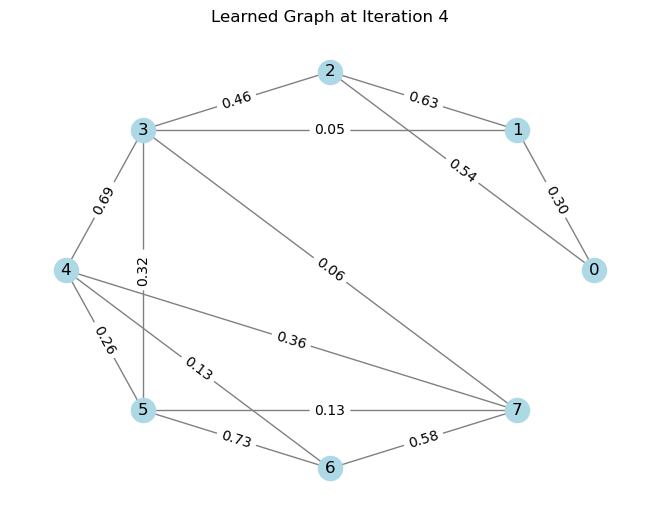

Iteration 5/7
after E-step: delta_W norm 0.1418, GLR 5.2196, adj norm^2 13.8389
after M-step-1: delta_W norm 0.1262, GLR 5.2487, adj norm^2 14.3093
PGD iter 1/100, ||S_new - S||_F = 0.3280
PGD iter 21/100, ||S_new - S||_F = 0.1581
PGD iter 41/100, ||S_new - S||_F = 0.0407
PGD iter 61/100, ||S_new - S||_F = 0.0147
PGD iter 81/100, ||S_new - S||_F = 0.0092
tensor([[0.0000, 0.2597, 0.3163, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2597, 0.0000, 0.2868, 0.0212, -0.0000, 0.0000, -0.0000, 0.0000],
        [0.3163, 0.2868, 0.0000, 0.2325, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0212, 0.2325, 0.0000, 0.3196, 0.1822, 0.0000, 0.0275],
        [0.0000, -0.0000, 0.0000, 0.3196, 0.0000, 0.3650, 0.1495, 0.2041],
        [0.0000, 0.0000, 0.0000, 0.1822, 0.3650, 0.0000, 0.2849, 0.0490],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.1495, 0.2849, 0.0000, 0.3076],
        [0.0000, 0.0000, -0.0000, 0.0275, 0.2041, 0.0490, 0.3076, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at I

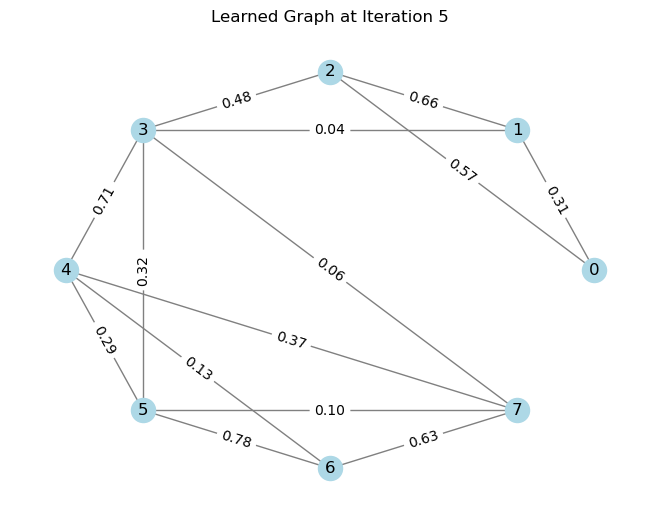

Iteration 6/7
after E-step: delta_W norm 0.1269, GLR 5.1546, adj norm^2 13.8142
after M-step-1: delta_W norm 0.1150, GLR 5.1810, adj norm^2 14.2256
PGD iter 1/100, ||S_new - S||_F = 0.3551
PGD iter 21/100, ||S_new - S||_F = 0.1537
PGD iter 41/100, ||S_new - S||_F = 0.0395
PGD iter 61/100, ||S_new - S||_F = 0.0139
PGD iter 81/100, ||S_new - S||_F = 0.0089
tensor([[0.0000, 0.2425, 0.3034, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2425, 0.0000, 0.2702, 0.0166, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.3034, 0.2702, 0.0000, 0.2185, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0166, 0.2185, 0.0000, 0.2999, 0.1686, 0.0000, 0.0246],
        [0.0000, -0.0000, 0.0000, 0.2999, 0.0000, 0.3652, 0.1277, 0.1912],
        [0.0000, 0.0000, 0.0000, 0.1686, 0.3652, 0.0000, 0.2708, 0.0368],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.1277, 0.2708, 0.0000, 0.2975],
        [0.0000, -0.0000, -0.0000, 0.0246, 0.1912, 0.0368, 0.2975, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 

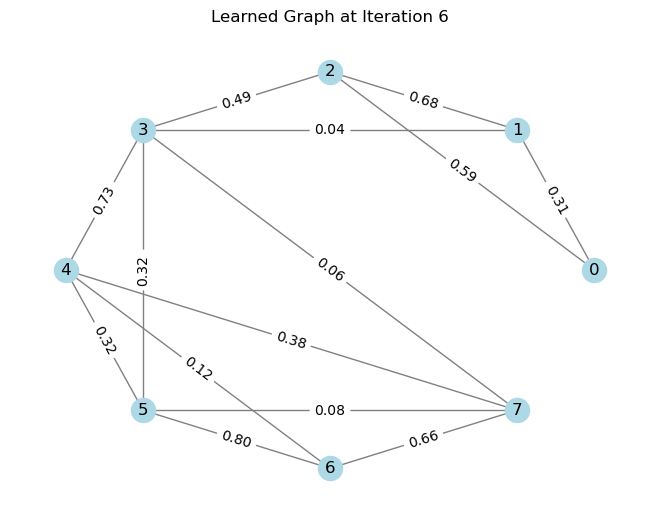

Iteration 7/7
after E-step: delta_W norm 0.1154, GLR 5.1071, adj norm^2 13.7977
after M-step-1: delta_W norm 0.1081, GLR 5.1322, adj norm^2 14.1571
PGD iter 1/100, ||S_new - S||_F = 0.3737
PGD iter 21/100, ||S_new - S||_F = 0.1465
PGD iter 41/100, ||S_new - S||_F = 0.0379
PGD iter 61/100, ||S_new - S||_F = 0.0136
PGD iter 81/100, ||S_new - S||_F = 0.0088
tensor([[0.0000, 0.2314, 0.2949, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2314, 0.0000, 0.2605, 0.0139, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.2949, 0.2605, 0.0000, 0.2097, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0139, 0.2097, 0.0000, 0.2882, 0.1607, 0.0000, 0.0224],
        [0.0000, -0.0000, -0.0000, 0.2882, 0.0000, 0.3653, 0.1123, 0.1844],
        [0.0000, 0.0000, 0.0000, 0.1607, 0.3653, 0.0000, 0.2620, 0.0305],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.1123, 0.2620, 0.0000, 0.2903],
        [0.0000, -0.0000, -0.0000, 0.0224, 0.1844, 0.0305, 0.2903, 0.0000]],
       grad_fn=<CopySlices>)
W norm^

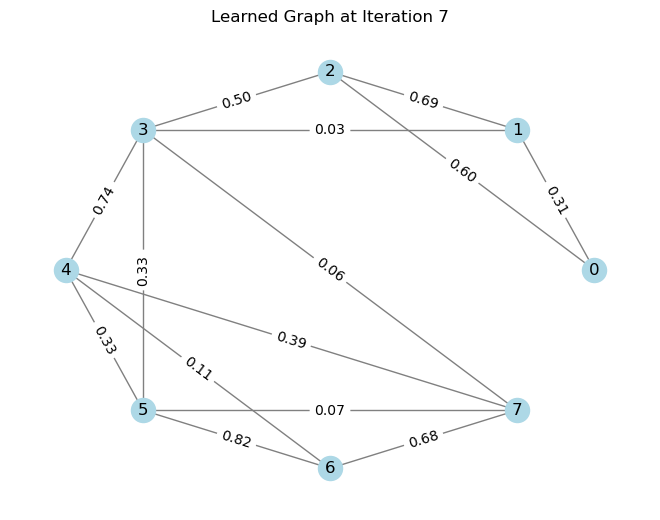

Final learned mask:
tensor([[0.0000, 0.2314, 0.2949, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2314, 0.0000, 0.2605, 0.0139, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.2949, 0.2605, 0.0000, 0.2097, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0139, 0.2097, 0.0000, 0.2882, 0.1607, 0.0000, 0.0224],
        [0.0000, -0.0000, -0.0000, 0.2882, 0.0000, 0.3653, 0.1123, 0.1844],
        [0.0000, 0.0000, 0.0000, 0.1607, 0.3653, 0.0000, 0.2620, 0.0305],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.1123, 0.2620, 0.0000, 0.2903],
        [0.0000, -0.0000, -0.0000, 0.0224, 0.1844, 0.0305, 0.2903, 0.0000]],
       grad_fn=<CopySlices>) tensor(1.3915, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.3125, 0.5996, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.3125, 0.0000, 0.6930, 0.0337, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.5996, 0.6930, 0.0000, 0.4986, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0337, 0.4986, 0.0000, 0.7

In [6]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.2371, GLR 11.6463, adj norm^2 15.7615
after M-step-1: delta_W norm 0.0667, GLR 11.4680, adj norm^2 15.8365
PGD iter 1/100, ||S_new - S||_F = 0.1474
PGD iter 21/100, ||S_new - S||_F = 0.1265
PGD iter 41/100, ||S_new - S||_F = 0.0798
PGD iter 61/100, ||S_new - S||_F = 0.0336
PGD iter 81/100, ||S_new - S||_F = 0.0150
tensor([[0.0000, 0.3582, 0.6041, 0.0000, 0.1299, 0.0000, 0.0000, 0.0000],
        [0.3582, 0.0000, 0.5788, 0.2915, 0.0585, 0.0643, 0.0075, 0.0639],
        [0.6041, 0.5788, 0.0000, 0.3375, 0.2431, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2915, 0.3375, 0.0000, 0.4904, 0.3732, 0.1608, 0.3198],
        [0.1299, 0.0585, 0.2431, 0.4904, 0.0000, 0.0000, 0.0134, 0.4631],
        [0.0000, 0.0643, 0.0000, 0.3732, 0.0000, 0.0000, 0.6356, 0.3500],
        [0.0000, 0.0075, 0.0000, 0.1608, 0.0134, 0.6356, 0.0000, 0.4939],
        [0.0000, 0.0639, 0.0000, 0.3198, 0.4631, 0.3500, 0.4939, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iterati

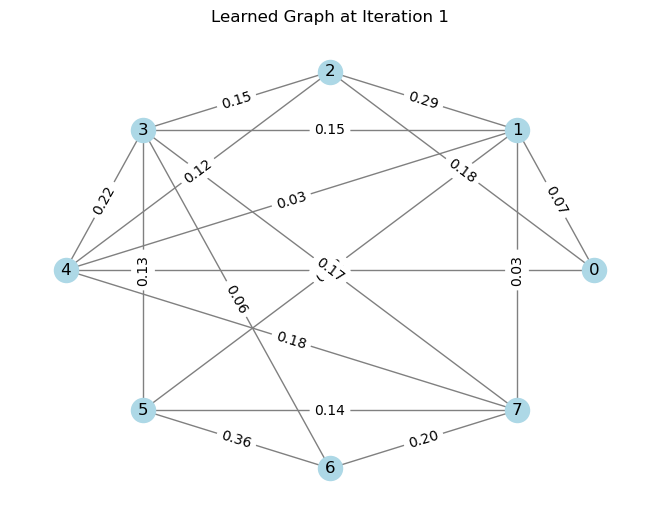

Iteration 2/7
after E-step: delta_W norm 0.0833, GLR 7.0758, adj norm^2 14.5398
after M-step-1: delta_W norm 0.2253, GLR 7.0423, adj norm^2 14.6892
PGD iter 1/100, ||S_new - S||_F = 0.3449
PGD iter 21/100, ||S_new - S||_F = 0.1269
PGD iter 41/100, ||S_new - S||_F = 0.0263
PGD iter 61/100, ||S_new - S||_F = 0.0123
PGD iter 81/100, ||S_new - S||_F = 0.0077
tensor([[0.0000, 0.2871, 0.4222, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2871, 0.0000, 0.4193, 0.1239, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4222, 0.4193, 0.0000, 0.2921, 0.0454, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.1239, 0.2921, 0.0000, 0.4621, 0.3110, 0.0000, 0.1239],
        [0.0000, 0.0000, 0.0454, 0.4621, 0.0000, 0.1194, 0.0272, 0.3408],
        [0.0000, 0.0000, 0.0000, 0.3110, 0.1194, 0.0000, 0.4634, 0.1543],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0272, 0.4634, 0.0000, 0.4071],
        [0.0000, 0.0000, 0.0000, 0.1239, 0.3408, 0.1543, 0.4071, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

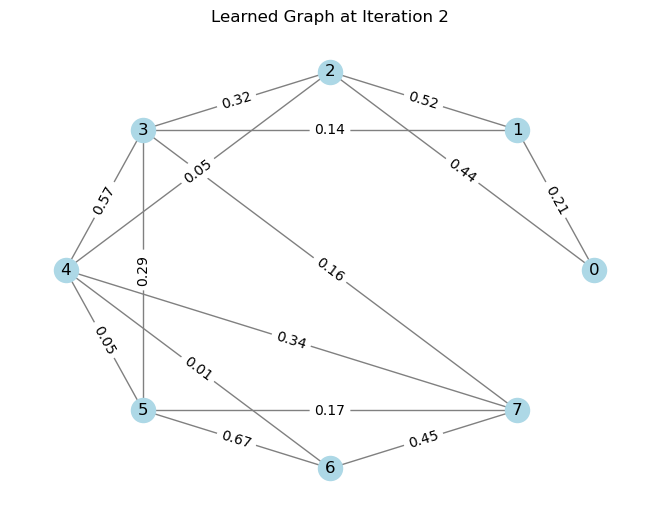

Iteration 3/7
after E-step: delta_W norm 0.1970, GLR 5.5602, adj norm^2 14.0006
after M-step-1: delta_W norm 0.1828, GLR 5.5826, adj norm^2 14.6433
PGD iter 1/100, ||S_new - S||_F = 0.4959
PGD iter 21/100, ||S_new - S||_F = 0.1005
PGD iter 41/100, ||S_new - S||_F = 0.0213
PGD iter 61/100, ||S_new - S||_F = 0.0101
PGD iter 81/100, ||S_new - S||_F = 0.0061
tensor([[0.0000, 0.2526, 0.3787, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2526, 0.0000, 0.3473, 0.0558, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3787, 0.3473, 0.0000, 0.2702, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0558, 0.2702, 0.0000, 0.3975, 0.2712, 0.0000, 0.0440],
        [0.0000, 0.0000, 0.0000, 0.3975, 0.0000, 0.1761, 0.0000, 0.3091],
        [0.0000, 0.0000, 0.0000, 0.2712, 0.1761, 0.0000, 0.3794, 0.0821],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3794, 0.0000, 0.3703],
        [0.0000, 0.0000, 0.0000, 0.0440, 0.3091, 0.0821, 0.3703, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

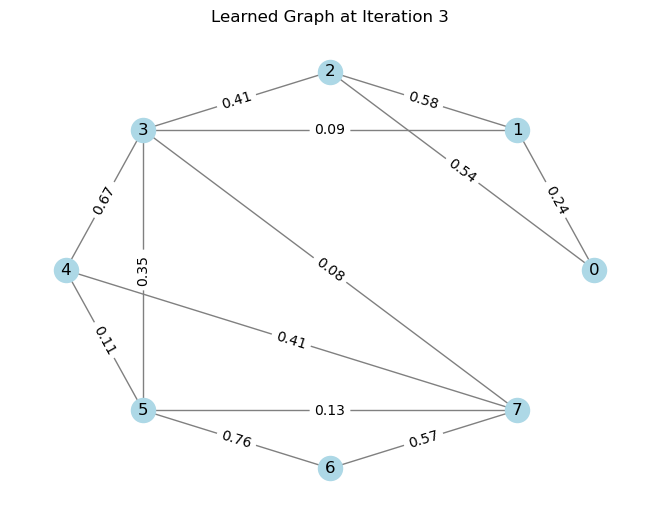

Iteration 4/7
after E-step: delta_W norm 0.1821, GLR 5.1501, adj norm^2 13.8444
after M-step-1: delta_W norm 0.1591, GLR 5.1905, adj norm^2 14.3369
PGD iter 1/100, ||S_new - S||_F = 0.5826
PGD iter 21/100, ||S_new - S||_F = 0.0804
PGD iter 41/100, ||S_new - S||_F = 0.0192
PGD iter 61/100, ||S_new - S||_F = 0.0098
PGD iter 81/100, ||S_new - S||_F = 0.0039
tensor([[0.0000, 0.2313, 0.3551, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2313, 0.0000, 0.3133, 0.0352, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3551, 0.3133, 0.0000, 0.2438, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0352, 0.2438, 0.0000, 0.3519, 0.2488, 0.0000, 0.0162],
        [0.0000, 0.0000, 0.0000, 0.3519, 0.0000, 0.1995, 0.0000, 0.2870],
        [0.0000, 0.0000, 0.0000, 0.2488, 0.1995, 0.0000, 0.3391, 0.0524],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3391, 0.0000, 0.3525],
        [0.0000, 0.0000, 0.0000, 0.0162, 0.2870, 0.0524, 0.3525, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

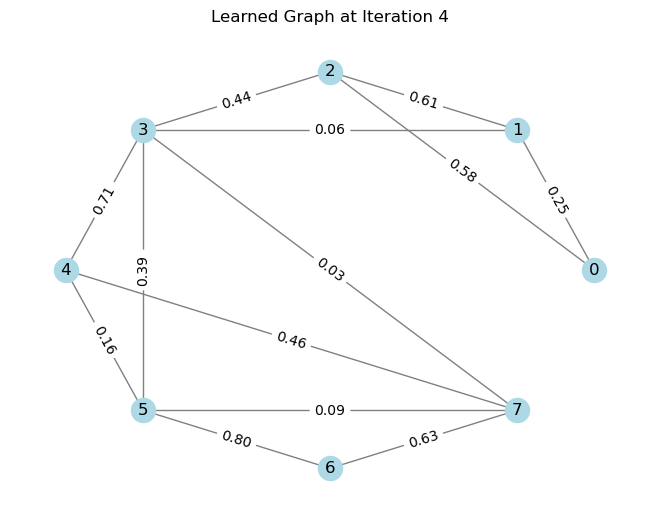

Iteration 5/7
after E-step: delta_W norm 0.1616, GLR 5.0278, adj norm^2 13.7921
after M-step-1: delta_W norm 0.1467, GLR 5.0706, adj norm^2 14.2452
PGD iter 1/100, ||S_new - S||_F = 0.6379
PGD iter 21/100, ||S_new - S||_F = 0.0805
PGD iter 41/100, ||S_new - S||_F = 0.0183
PGD iter 61/100, ||S_new - S||_F = 0.0095
PGD iter 81/100, ||S_new - S||_F = 0.0037
tensor([[0.0000, 0.2186, 0.3379, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2186, 0.0000, 0.2944, 0.0260, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.3379, 0.2944, 0.0000, 0.2301, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0260, 0.2301, 0.0000, 0.3312, 0.2358, 0.0000, 0.0043],
        [0.0000, 0.0000, 0.0000, 0.3312, 0.0000, 0.2070, 0.0000, 0.2749],
        [0.0000, 0.0000, 0.0000, 0.2358, 0.2070, 0.0000, 0.3179, 0.0383],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.0000, 0.3179, 0.0000, 0.3397],
        [0.0000, 0.0000, 0.0000, 0.0043, 0.2749, 0.0383, 0.3397, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Itera

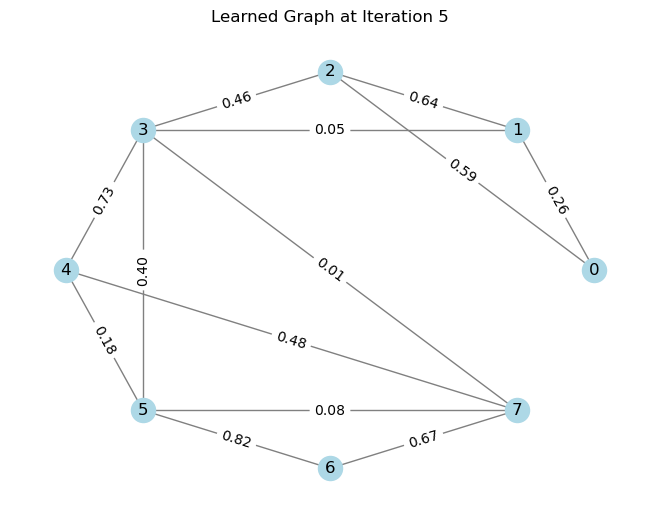

Iteration 6/7
after E-step: delta_W norm 0.1473, GLR 4.9603, adj norm^2 13.7645
after M-step-1: delta_W norm 0.1423, GLR 5.0047, adj norm^2 14.1860
PGD iter 1/100, ||S_new - S||_F = 0.6723
PGD iter 21/100, ||S_new - S||_F = 0.0791
PGD iter 41/100, ||S_new - S||_F = 0.0180
PGD iter 61/100, ||S_new - S||_F = 0.0093
PGD iter 81/100, ||S_new - S||_F = 0.0035
tensor([[0.0000, 0.2116, 0.3264, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2116, 0.0000, 0.2843, 0.0215, -0.0000, 0.0000, -0.0000, 0.0000],
        [0.3264, 0.2843, 0.0000, 0.2222, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0215, 0.2222, 0.0000, 0.3197, 0.2268, 0.0000, 0.0000],
        [0.0000, -0.0000, 0.0000, 0.3197, 0.0000, 0.2107, 0.0000, 0.2677],
        [0.0000, 0.0000, 0.0000, 0.2268, 0.2107, 0.0000, 0.3059, 0.0308],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.0000, 0.3059, 0.0000, 0.3312],
        [0.0000, 0.0000, -0.0000, 0.0000, 0.2677, 0.0308, 0.3312, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at I

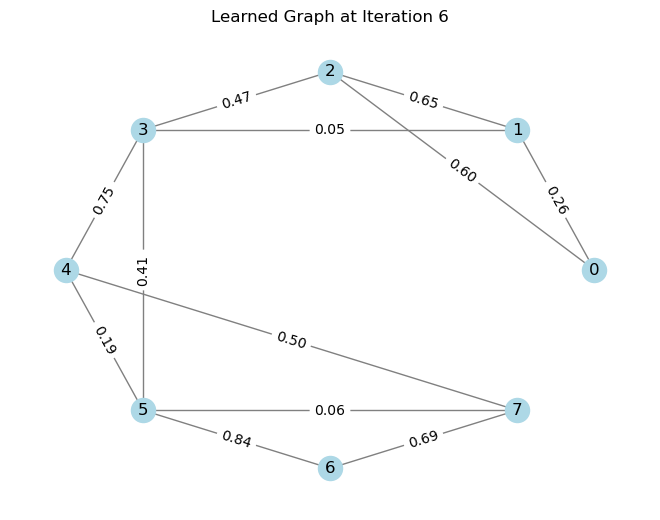

Iteration 7/7
after E-step: delta_W norm 0.1425, GLR 4.9268, adj norm^2 13.7511
after M-step-1: delta_W norm 0.1391, GLR 4.9715, adj norm^2 14.1726
PGD iter 1/100, ||S_new - S||_F = 0.6946
PGD iter 21/100, ||S_new - S||_F = 0.0777
PGD iter 41/100, ||S_new - S||_F = 0.0179
PGD iter 61/100, ||S_new - S||_F = 0.0093
PGD iter 81/100, ||S_new - S||_F = 0.0035
tensor([[0.0000, 0.2070, 0.3182, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2070, 0.0000, 0.2769, 0.0190, -0.0000, 0.0000, -0.0000, 0.0000],
        [0.3182, 0.2769, 0.0000, 0.2178, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0190, 0.2178, 0.0000, 0.3133, 0.2222, 0.0000, 0.0000],
        [0.0000, -0.0000, 0.0000, 0.3133, 0.0000, 0.2094, 0.0000, 0.2621],
        [0.0000, 0.0000, 0.0000, 0.2222, 0.2094, 0.0000, 0.2986, 0.0262],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.0000, 0.2986, 0.0000, 0.3273],
        [0.0000, 0.0000, -0.0000, 0.0000, 0.2621, 0.0262, 0.3273, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at I

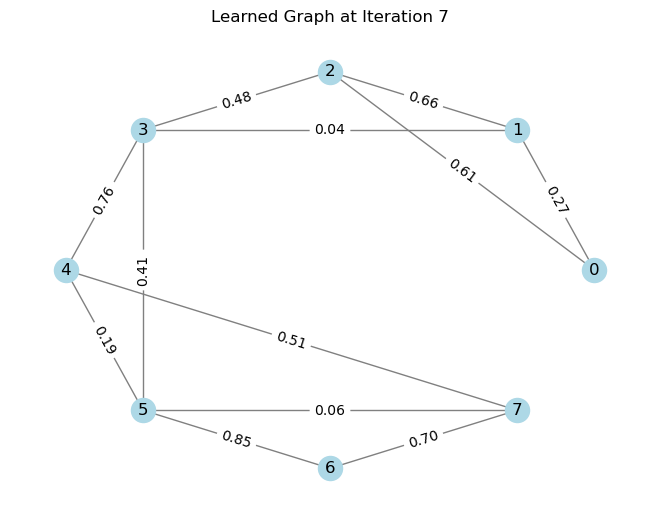

Final learned mask:
tensor([[0.0000, 0.2070, 0.3182, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2070, 0.0000, 0.2769, 0.0190, -0.0000, 0.0000, -0.0000, 0.0000],
        [0.3182, 0.2769, 0.0000, 0.2178, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0190, 0.2178, 0.0000, 0.3133, 0.2222, 0.0000, 0.0000],
        [0.0000, -0.0000, 0.0000, 0.3133, 0.0000, 0.2094, 0.0000, 0.2621],
        [0.0000, 0.0000, 0.0000, 0.2222, 0.2094, 0.0000, 0.2986, 0.0262],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.0000, 0.2986, 0.0000, 0.3273],
        [0.0000, 0.0000, -0.0000, 0.0000, 0.2621, 0.0262, 0.3273, 0.0000]],
       grad_fn=<CopySlices>) tensor(1.4511, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.2658, 0.6079, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2658, 0.0000, 0.6614, 0.0419, -0.0000, 0.0000, -0.0000, 0.0000],
        [0.6079, 0.6614, 0.0000, 0.4769, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0419, 0.4769, 0.0000, 0.7568, 0.41

In [7]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.2371, GLR 11.6463, adj norm^2 15.7615
after M-step-1: delta_W norm 0.0667, GLR 11.4680, adj norm^2 15.8365
PGD iter 1/50, ||S_new - S||_F = 0.1327
PGD iter 21/50, ||S_new - S||_F = 0.1231
PGD iter 41/50, ||S_new - S||_F = 0.0996
tensor([[0.0000, 0.3285, 0.3802, 0.2264, 0.1590, 0.1906, 0.1682, 0.1481],
        [0.3285, 0.0000, 0.3863, 0.2124, 0.1141, 0.1320, 0.0745, 0.0366],
        [0.3802, 0.3863, 0.0000, 0.2854, 0.1776, 0.1997, 0.1475, 0.1052],
        [0.2264, 0.2124, 0.2854, 0.0000, 0.3790, 0.3236, 0.2435, 0.2841],
        [0.1590, 0.1141, 0.1776, 0.3790, 0.0000, 0.2822, 0.2734, 0.3425],
        [0.1906, 0.1320, 0.1997, 0.3236, 0.2822, 0.0000, 0.4308, 0.3346],
        [0.1682, 0.0745, 0.1475, 0.2435, 0.2734, 0.4308, 0.0000, 0.3673],
        [0.1481, 0.0366, 0.1052, 0.2841, 0.3425, 0.3346, 0.3673, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.5911, grad_fn=<PowBackward0>)


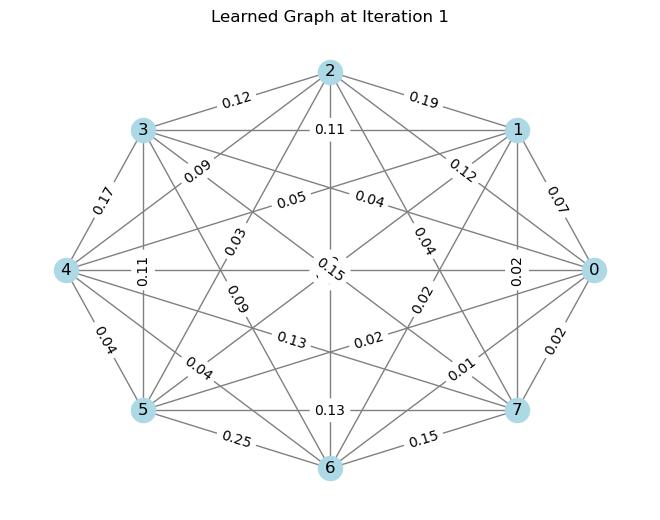

Iteration 2/7
after E-step: delta_W norm 0.0868, GLR 9.5816, adj norm^2 14.9879
after M-step-1: delta_W norm 0.1350, GLR 9.4486, adj norm^2 14.5116
PGD iter 1/50, ||S_new - S||_F = 0.2436
PGD iter 21/50, ||S_new - S||_F = 0.2011
PGD iter 41/50, ||S_new - S||_F = 0.0515
tensor([[0.0000, 0.2721, 0.2711, 0.0372, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2721, 0.0000, 0.3108, 0.0595, 0.0050, 0.0000, 0.0000, 0.0038],
        [0.2711, 0.3108, 0.0000, 0.2027, 0.0355, 0.0000, 0.0000, 0.0000],
        [0.0372, 0.0595, 0.2027, 0.0000, 0.3158, 0.1957, 0.0000, 0.0586],
        [0.0000, 0.0050, 0.0355, 0.3158, 0.0000, 0.2699, 0.2070, 0.2212],
        [0.0000, 0.0000, 0.0000, 0.1957, 0.2699, 0.0000, 0.2847, 0.1479],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2070, 0.2847, 0.0000, 0.2590],
        [0.0000, 0.0038, 0.0000, 0.0586, 0.2212, 0.1479, 0.2590, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.9047, grad_fn=<PowBackward0>)


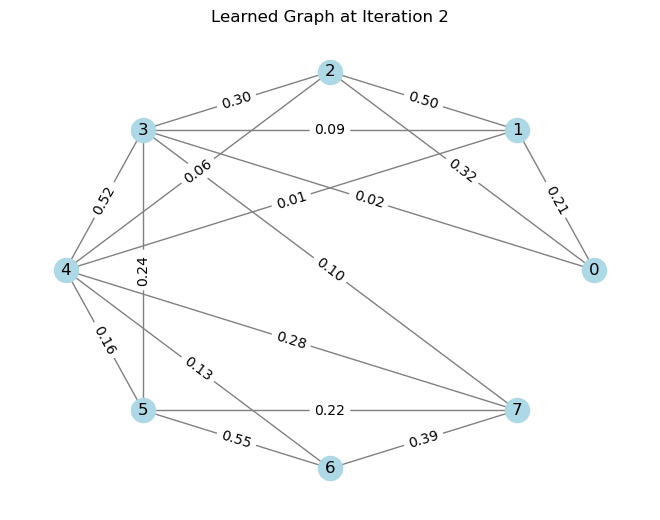

Iteration 3/7
after E-step: delta_W norm 0.1145, GLR 5.7715, adj norm^2 14.0316
after M-step-1: delta_W norm 0.1427, GLR 5.8191, adj norm^2 14.4781
PGD iter 1/50, ||S_new - S||_F = 0.3994
PGD iter 21/50, ||S_new - S||_F = 0.1534
PGD iter 41/50, ||S_new - S||_F = 0.0284
tensor([[0.0000, 0.1948, 0.2105, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1948, 0.0000, 0.2130, 0.0345, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2105, 0.2130, 0.0000, 0.1723, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0345, 0.1723, 0.0000, 0.2438, 0.1234, 0.0000, 0.0365],
        [0.0000, 0.0000, 0.0000, 0.2438, 0.0000, 0.2671, 0.1401, 0.1471],
        [0.0000, 0.0000, 0.0000, 0.1234, 0.2671, 0.0000, 0.2027, 0.0608],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1401, 0.2027, 0.0000, 0.2054],
        [0.0000, 0.0000, 0.0000, 0.0365, 0.1471, 0.0608, 0.2054, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.7441, grad_fn=<PowBackward0>)


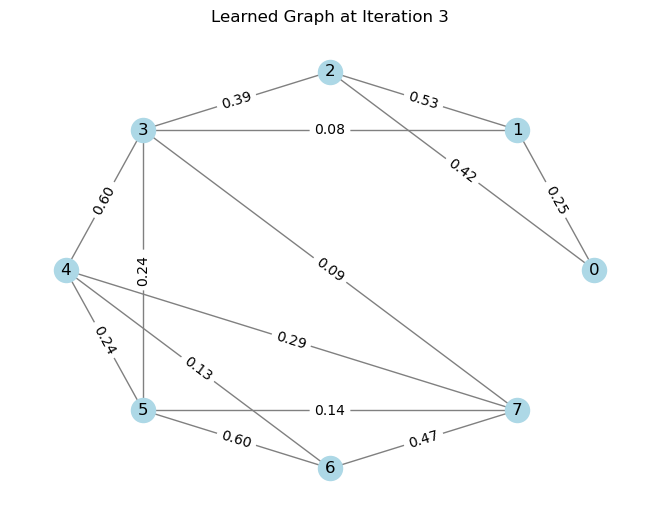

Iteration 4/7
after E-step: delta_W norm 0.1393, GLR 5.3825, adj norm^2 13.9007
after M-step-1: delta_W norm 0.1344, GLR 5.4141, adj norm^2 14.3903
PGD iter 1/50, ||S_new - S||_F = 0.5244
PGD iter 21/50, ||S_new - S||_F = 0.1175
PGD iter 41/50, ||S_new - S||_F = 0.0225
tensor([[0.0000, 0.1524, 0.1824, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1524, 0.0000, 0.1688, 0.0225, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1824, 0.1688, 0.0000, 0.1392, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0225, 0.1392, 0.0000, 0.1894, 0.0936, 0.0000, 0.0339],
        [0.0000, 0.0000, 0.0000, 0.1894, 0.0000, 0.2653, 0.0917, 0.1074],
        [0.0000, 0.0000, 0.0000, 0.0936, 0.2653, 0.0000, 0.1695, 0.0321],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0917, 0.1695, 0.0000, 0.1806],
        [0.0000, 0.0000, 0.0000, 0.0339, 0.1074, 0.0321, 0.1806, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.6681, grad_fn=<PowBackward0>)


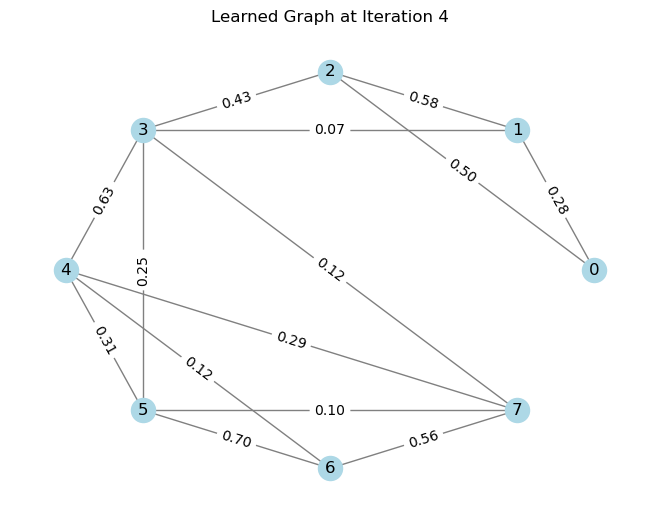

Iteration 5/7
after E-step: delta_W norm 0.1360, GLR 5.2952, adj norm^2 13.8654
after M-step-1: delta_W norm 0.1227, GLR 5.3182, adj norm^2 14.2826
PGD iter 1/50, ||S_new - S||_F = 0.6261
PGD iter 21/50, ||S_new - S||_F = 0.1114
PGD iter 41/50, ||S_new - S||_F = 0.0207
tensor([[0.0000, 0.1275, 0.1683, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1275, 0.0000, 0.1496, 0.0149, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.1683, 0.1496, 0.0000, 0.1212, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0149, 0.1212, 0.0000, 0.1635, 0.0810, 0.0000, 0.0277],
        [0.0000, 0.0000, 0.0000, 0.1635, 0.0000, 0.2598, 0.0532, 0.0940],
        [0.0000, 0.0000, 0.0000, 0.0810, 0.2598, 0.0000, 0.1529, 0.0208],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.0532, 0.1529, 0.0000, 0.1654],
        [0.0000, 0.0000, 0.0000, 0.0277, 0.0940, 0.0208, 0.1654, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(5.5539, grad_fn=<PowBackward0>)


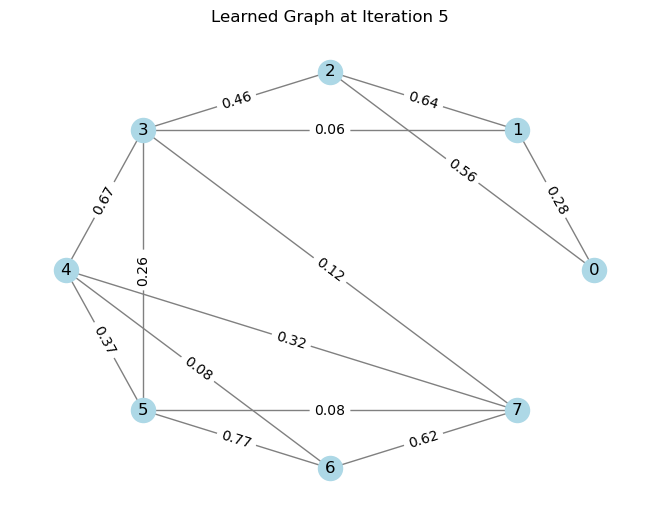

Iteration 6/7
after E-step: delta_W norm 0.1228, GLR 5.1785, adj norm^2 13.8275
after M-step-1: delta_W norm 0.1175, GLR 5.2000, adj norm^2 14.1374
PGD iter 1/50, ||S_new - S||_F = 0.6965
PGD iter 21/50, ||S_new - S||_F = 0.0987
PGD iter 41/50, ||S_new - S||_F = 0.0200
tensor([[0.0000, 0.1137, 0.1600, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1137, 0.0000, 0.1403, 0.0107, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.1600, 0.1403, 0.0000, 0.1118, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0107, 0.1118, 0.0000, 0.1512, 0.0757, 0.0000, 0.0225],
        [0.0000, -0.0000, 0.0000, 0.1512, 0.0000, 0.2533, 0.0270, 0.0914],
        [0.0000, 0.0000, 0.0000, 0.0757, 0.2533, 0.0000, 0.1442, 0.0146],
        [0.0000, -0.0000, -0.0000, 0.0000, 0.0270, 0.1442, 0.0000, 0.1562],
        [0.0000, -0.0000, -0.0000, 0.0225, 0.0914, 0.0146, 0.1562, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 6 tensor(6.1551, grad_fn=<PowBackward0>)


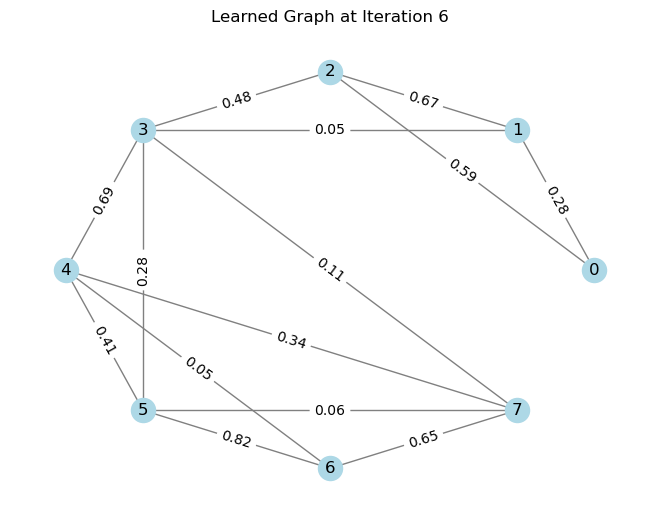

Iteration 7/7
after E-step: delta_W norm 0.1166, GLR 5.0836, adj norm^2 13.7967
after M-step-1: delta_W norm 0.1181, GLR 5.1077, adj norm^2 14.0321
PGD iter 1/50, ||S_new - S||_F = 0.7410
PGD iter 21/50, ||S_new - S||_F = 0.0864
PGD iter 41/50, ||S_new - S||_F = 0.0202
tensor([[0.0000, 0.1056, 0.1544, 0.0000, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.1056, 0.0000, 0.1341, 0.0033, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.1544, 0.1341, 0.0000, 0.1042, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0033, 0.1042, 0.0000, 0.1450, 0.0739, 0.0000, 0.0188],
        [-0.0000, -0.0000, -0.0000, 0.1450, 0.0000, 0.2495, 0.0104, 0.0920],
        [0.0000, -0.0000, 0.0000, 0.0739, 0.2495, 0.0000, 0.1397, 0.0105],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.0104, 0.1397, 0.0000, 0.1516],
        [-0.0000, -0.0000, -0.0000, 0.0188, 0.0920, 0.0105, 0.1516, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 7 tensor(6.4885, grad_fn=<PowBackward0>)


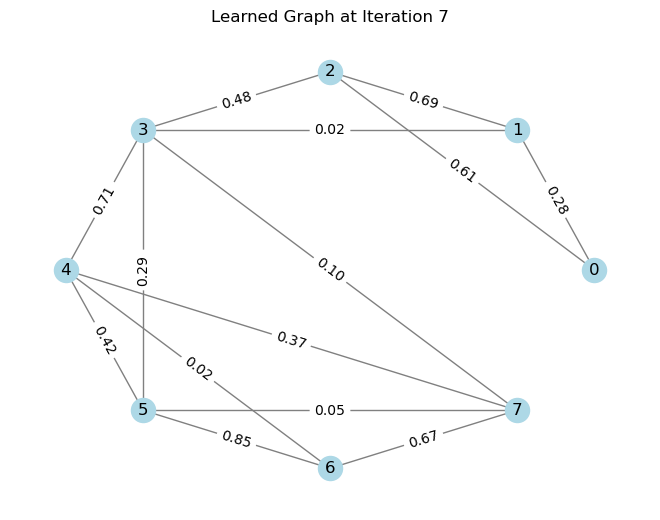

Final learned mask:
tensor([[0.0000, 0.1056, 0.1544, 0.0000, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.1056, 0.0000, 0.1341, 0.0033, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.1544, 0.1341, 0.0000, 0.1042, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0033, 0.1042, 0.0000, 0.1450, 0.0739, 0.0000, 0.0188],
        [-0.0000, -0.0000, -0.0000, 0.1450, 0.0000, 0.2495, 0.0104, 0.0920],
        [0.0000, -0.0000, 0.0000, 0.0739, 0.2495, 0.0000, 0.1397, 0.0105],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.0104, 0.1397, 0.0000, 0.1516],
        [-0.0000, -0.0000, -0.0000, 0.0188, 0.0920, 0.0105, 0.1516, 0.0000]],
       grad_fn=<CopySlices>) tensor(0.4083, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.2802, 0.6115, 0.0000, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.2802, 0.0000, 0.6903, 0.0156, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.6115, 0.6903, 0.0000, 0.4762, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0156, 0.4762, 0.

In [8]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.8,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.2371, GLR 11.6463, adj norm^2 15.7615
after M-step-1: delta_W norm 0.0667, GLR 11.4680, adj norm^2 15.8365
PGD iter 1/50, ||S_new - S||_F = 0.0900
PGD iter 21/50, ||S_new - S||_F = 0.0802
PGD iter 41/50, ||S_new - S||_F = 0.0654
tensor([[0.0000, 0.7290, 0.7809, 0.5467, 0.3459, 0.5205, 0.4689, 0.4000],
        [0.7290, 0.0000, 0.7822, 0.4335, 0.2388, 0.3236, 0.2046, 0.0908],
        [0.7809, 0.7822, 0.0000, 0.6066, 0.3469, 0.5140, 0.3975, 0.2580],
        [0.5467, 0.4335, 0.6066, 0.0000, 0.7896, 0.7006, 0.5379, 0.5818],
        [0.3459, 0.2388, 0.3469, 0.7896, 0.0000, 0.6952, 0.6696, 0.7281],
        [0.5205, 0.3236, 0.5140, 0.7006, 0.6952, 0.0000, 0.8358, 0.7040],
        [0.4689, 0.2046, 0.3975, 0.5379, 0.6696, 0.8358, 0.0000, 0.7671],
        [0.4000, 0.0908, 0.2580, 0.5818, 0.7281, 0.7040, 0.7671, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.5357, grad_fn=<PowBackward0>)


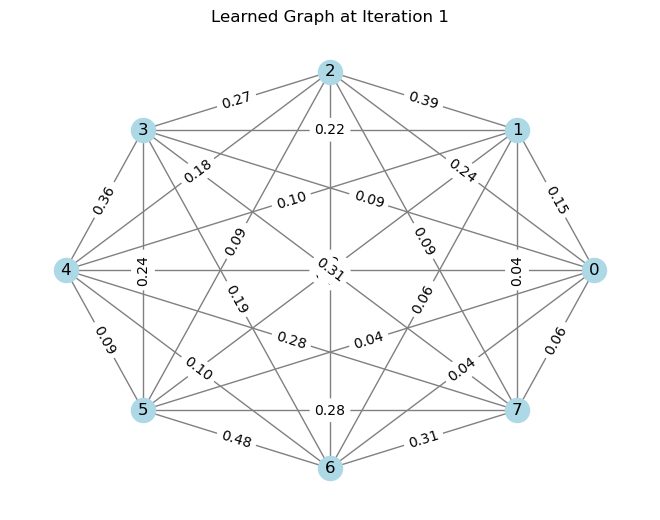

Iteration 2/7
after E-step: delta_W norm 0.0899, GLR 10.0335, adj norm^2 15.0644
after M-step-1: delta_W norm 0.1184, GLR 9.8469, adj norm^2 14.5796
PGD iter 1/50, ||S_new - S||_F = 0.1614
PGD iter 21/50, ||S_new - S||_F = 0.1388
PGD iter 41/50, ||S_new - S||_F = 0.0588
tensor([[0.0000, 0.6977, 0.7065, 0.3690, -0.0000, 0.3179, 0.2038, 0.1079],
        [0.6977, 0.0000, 0.7480, 0.1606, 0.0000, -0.0000, -0.0000, -0.0000],
        [0.7065, 0.7480, 0.0000, 0.4308, 0.0000, 0.2306, -0.0000, -0.0000],
        [0.3690, 0.1606, 0.4308, 0.0000, 0.7371, 0.5722, 0.2957, 0.3423],
        [-0.0000, 0.0000, 0.0000, 0.7371, 0.0000, 0.6914, 0.6246, 0.6399],
        [0.3179, -0.0000, 0.2306, 0.5722, 0.6914, 0.0000, 0.7244, 0.5607],
        [0.2038, -0.0000, -0.0000, 0.2957, 0.6246, 0.7244, 0.0000, 0.6816],
        [0.1079, -0.0000, -0.0000, 0.3423, 0.6399, 0.5607, 0.6816, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(4.6353, grad_fn=<PowBackward0>)


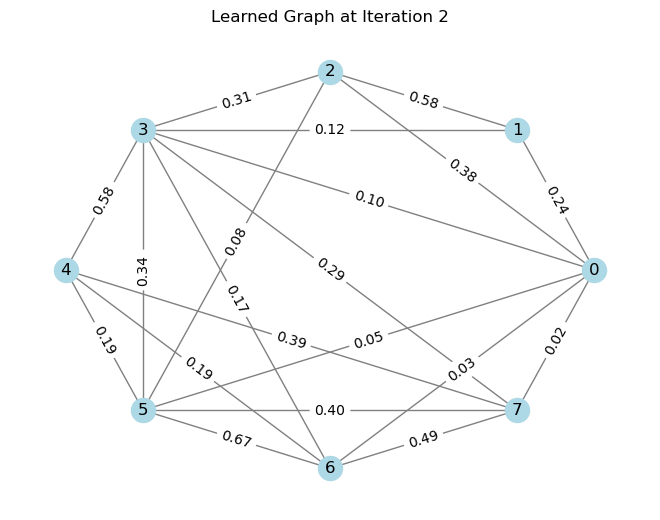

Iteration 3/7
after E-step: delta_W norm 0.1002, GLR 6.7909, adj norm^2 14.1819
after M-step-1: delta_W norm 0.2895, GLR 7.1475, adj norm^2 15.0105
PGD iter 1/50, ||S_new - S||_F = 0.2465
PGD iter 21/50, ||S_new - S||_F = 0.1650
PGD iter 41/50, ||S_new - S||_F = 0.0375
tensor([[0.0000, 0.6128, 0.6165, 0.1718, -0.0000, 0.0376, -0.0000, -0.0000],
        [0.6128, 0.0000, 0.6790, 0.0420, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.6165, 0.6790, 0.0000, 0.3704, 0.0000, 0.0628, -0.0000, -0.0000],
        [0.1718, 0.0420, 0.3704, 0.0000, 0.6617, 0.5302, 0.1591, 0.1705],
        [-0.0000, 0.0000, 0.0000, 0.6617, 0.0000, 0.6907, 0.6102, 0.5910],
        [0.0376, 0.0000, 0.0628, 0.5302, 0.6907, 0.0000, 0.6721, 0.5023],
        [-0.0000, -0.0000, -0.0000, 0.1591, 0.6102, 0.6721, 0.0000, 0.6587],
        [-0.0000, -0.0000, -0.0000, 0.1705, 0.5910, 0.5023, 0.6587, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(5.5475, grad_fn=<PowBackward0>)


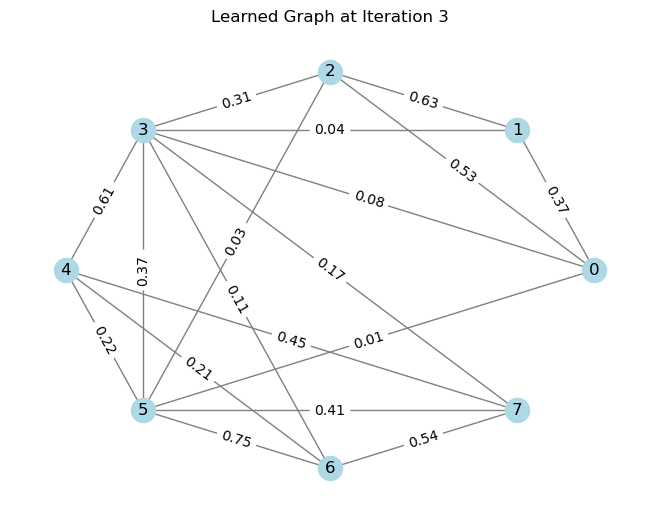

Iteration 4/7
after E-step: delta_W norm 0.2688, GLR 5.6059, adj norm^2 13.9796
after M-step-1: delta_W norm 0.1545, GLR 5.6769, adj norm^2 14.5092
PGD iter 1/50, ||S_new - S||_F = 0.2854
PGD iter 21/50, ||S_new - S||_F = 0.1480
PGD iter 41/50, ||S_new - S||_F = 0.0366
tensor([[0.0000, 0.6405, 0.6375, 0.1658, 0.0000, 0.0234, -0.0000, -0.0000],
        [0.6405, 0.0000, 0.6466, 0.0342, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.6375, 0.6466, 0.0000, 0.3501, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.1658, 0.0342, 0.3501, 0.0000, 0.6286, 0.4741, 0.0320, 0.0432],
        [0.0000, 0.0000, 0.0000, 0.6286, 0.0000, 0.6831, 0.5870, 0.5459],
        [0.0234, 0.0000, 0.0000, 0.4741, 0.6831, 0.0000, 0.6217, 0.4311],
        [-0.0000, -0.0000, -0.0000, 0.0320, 0.5870, 0.6217, 0.0000, 0.6209],
        [-0.0000, 0.0000, 0.0000, 0.0432, 0.5459, 0.4311, 0.6209, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(6.1741, grad_fn=<PowBackward0>)


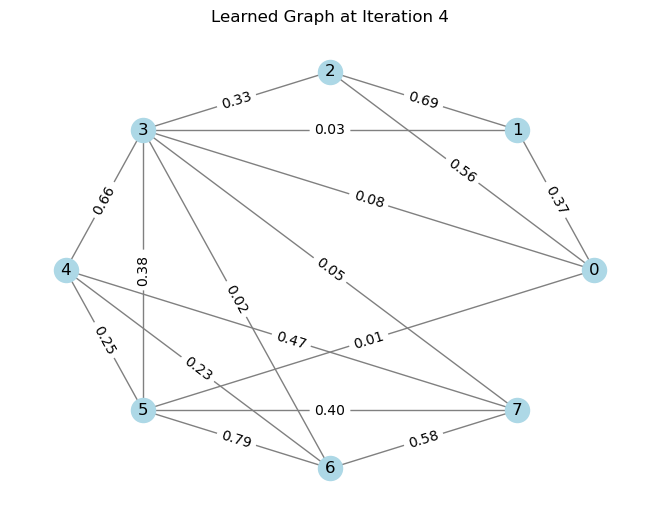

Iteration 5/7
after E-step: delta_W norm 0.1659, GLR 5.3295, adj norm^2 13.8822
after M-step-1: delta_W norm 0.1367, GLR 5.3986, adj norm^2 14.1997
PGD iter 1/50, ||S_new - S||_F = 0.3062
PGD iter 21/50, ||S_new - S||_F = 0.1341
PGD iter 41/50, ||S_new - S||_F = 0.0320
tensor([[0.0000, 0.6352, 0.6318, 0.1658, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.6352, 0.0000, 0.6372, 0.0285, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.6318, 0.6372, 0.0000, 0.3482, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.1658, 0.0285, 0.3482, 0.0000, 0.6041, 0.4407, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.6041, 0.0000, 0.6818, 0.5688, 0.5185],
        [0.0000, 0.0000, 0.0000, 0.4407, 0.6818, 0.0000, 0.5914, 0.3734],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.5688, 0.5914, 0.0000, 0.5958],
        [-0.0000, 0.0000, 0.0000, 0.0000, 0.5185, 0.3734, 0.5958, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(6.4679, grad_fn=<PowBackward0>)


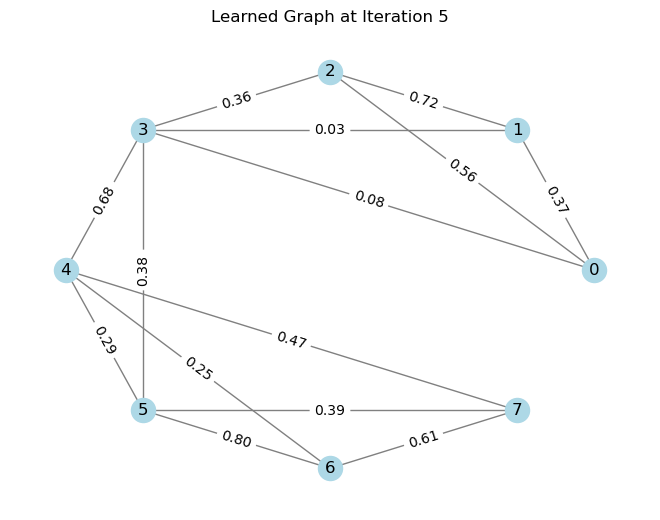

Iteration 6/7
after E-step: delta_W norm 0.1400, GLR 5.2278, adj norm^2 13.8472
after M-step-1: delta_W norm 0.1213, GLR 5.2932, adj norm^2 14.2426
PGD iter 1/50, ||S_new - S||_F = 0.3209
PGD iter 21/50, ||S_new - S||_F = 0.1351
PGD iter 41/50, ||S_new - S||_F = 0.0266
tensor([[0.0000, 0.6200, 0.6167, 0.1518, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.6200, 0.0000, 0.6203, 0.0253, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.6167, 0.6203, 0.0000, 0.3498, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.1518, 0.0253, 0.3498, 0.0000, 0.5933, 0.4253, -0.0000, 0.0000],
        [-0.0000, 0.0000, 0.0000, 0.5933, 0.0000, 0.6823, 0.5643, 0.4962],
        [0.0000, 0.0000, 0.0000, 0.4253, 0.6823, 0.0000, 0.5708, 0.3472],
        [-0.0000, -0.0000, -0.0000, -0.0000, 0.5643, 0.5708, 0.0000, 0.5860],
        [-0.0000, -0.0000, 0.0000, 0.0000, 0.4962, 0.3472, 0.5860, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 6 tensor(6.6311, grad_fn=<PowBackward0>)


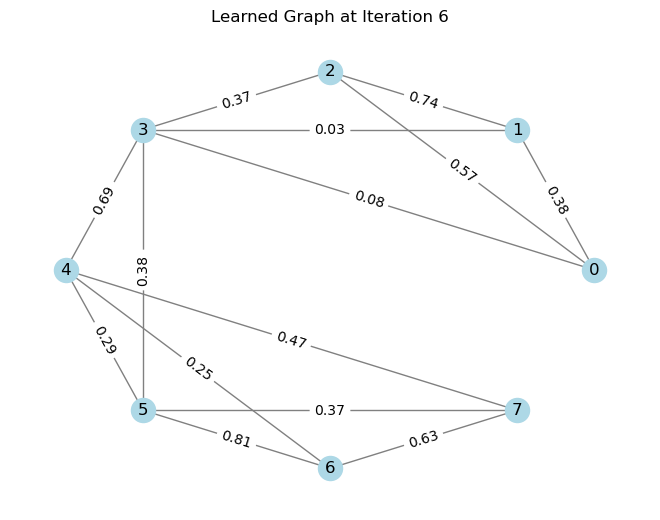

Iteration 7/7
after E-step: delta_W norm 0.1219, GLR 5.2280, adj norm^2 13.8446
after M-step-1: delta_W norm 0.1164, GLR 5.2869, adj norm^2 14.2214
PGD iter 1/50, ||S_new - S||_F = 0.3290
PGD iter 21/50, ||S_new - S||_F = 0.1336
PGD iter 41/50, ||S_new - S||_F = 0.0271
tensor([[0.0000, 0.6128, 0.6071, 0.1433, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.6128, 0.0000, 0.6103, 0.0231, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.6071, 0.6103, 0.0000, 0.3485, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.1433, 0.0231, 0.3485, 0.0000, 0.5852, 0.4163, -0.0000, 0.0000],
        [-0.0000, -0.0000, 0.0000, 0.5852, 0.0000, 0.6794, 0.5602, 0.4832],
        [0.0000, 0.0000, 0.0000, 0.4163, 0.6794, 0.0000, 0.5590, 0.3277],
        [-0.0000, -0.0000, -0.0000, -0.0000, 0.5602, 0.5590, 0.0000, 0.5788],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.4832, 0.3277, 0.5788, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 7 tensor(6.7563, grad_fn=<PowBackward0>)


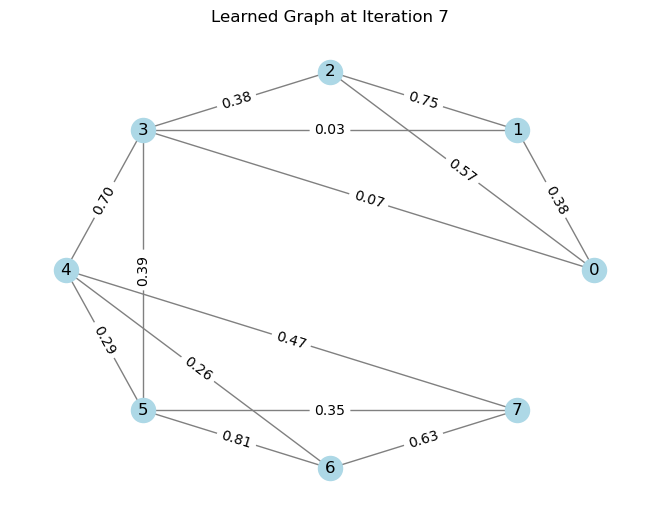

Final learned mask:
tensor([[0.0000, 0.6128, 0.6071, 0.1433, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.6128, 0.0000, 0.6103, 0.0231, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.6071, 0.6103, 0.0000, 0.3485, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.1433, 0.0231, 0.3485, 0.0000, 0.5852, 0.4163, -0.0000, 0.0000],
        [-0.0000, -0.0000, 0.0000, 0.5852, 0.0000, 0.6794, 0.5602, 0.4832],
        [0.0000, 0.0000, 0.0000, 0.4163, 0.6794, 0.0000, 0.5590, 0.3277],
        [-0.0000, -0.0000, -0.0000, -0.0000, 0.5602, 0.5590, 0.0000, 0.5788],
        [-0.0000, -0.0000, -0.0000, 0.0000, 0.4832, 0.3277, 0.5788, 0.0000]],
       grad_fn=<CopySlices>) tensor(7.0769, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.3813, 0.5715, 0.0729, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.3813, 0.0000, 0.7468, 0.0256, -0.0000, 0.0000, -0.0000, -0.0000],
        [0.5715, 0.7468, 0.0000, 0.3807, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0729, 0.0256, 0.3807, 0.0000

In [9]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.2,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.1367, GLR 16.8665, adj norm^2 14.3648
after M-step-1: delta_W norm 0.3085, GLR 15.4335, adj norm^2 13.0511
PGD iter 1/50, ||S_new - S||_F = 0.0856
PGD iter 21/50, ||S_new - S||_F = 0.0804
PGD iter 41/50, ||S_new - S||_F = 0.0718
tensor([[0.0000, 0.6610, 0.6914, 0.5785, 0.4715, 0.5659, 0.5420, 0.5173],
        [0.6610, 0.0000, 0.6325, 0.3842, 0.2162, 0.3655, 0.2821, 0.1649],
        [0.6914, 0.6325, 0.0000, 0.5226, 0.2954, 0.4991, 0.4089, 0.2841],
        [0.5785, 0.3842, 0.5226, 0.0000, 0.6435, 0.6014, 0.4760, 0.4763],
        [0.4715, 0.2162, 0.2954, 0.6435, 0.0000, 0.6418, 0.6152, 0.6066],
        [0.5659, 0.3655, 0.4991, 0.6014, 0.6418, 0.0000, 0.6591, 0.5852],
        [0.5420, 0.2821, 0.4089, 0.4760, 0.6152, 0.6591, 0.0000, 0.6374],
        [0.5173, 0.1649, 0.2841, 0.4763, 0.6066, 0.5852, 0.6374, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.8851, grad_fn=<PowBackward0>)


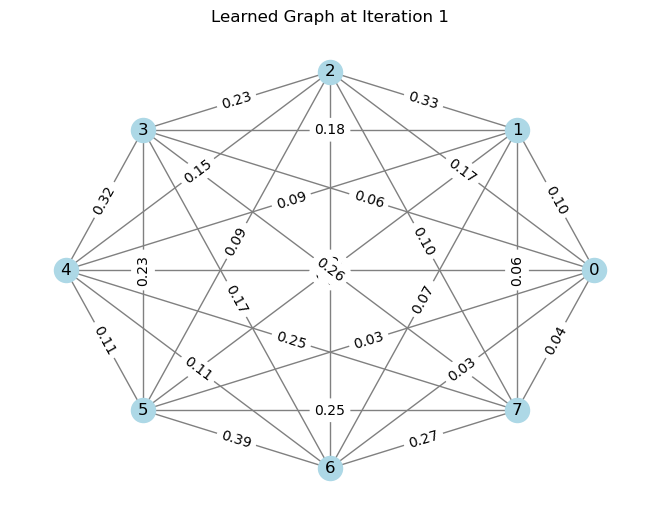

Iteration 2/7
after E-step: delta_W norm 0.3324, GLR 15.1823, adj norm^2 13.9863
after M-step-1: delta_W norm 0.1520, GLR 15.2149, adj norm^2 13.3289
PGD iter 1/50, ||S_new - S||_F = 0.1455
PGD iter 21/50, ||S_new - S||_F = 0.1350
PGD iter 41/50, ||S_new - S||_F = 0.0849
tensor([[0.0000, 0.5751, 0.5429, 0.3471, 0.0044, 0.2848, 0.1997, 0.1812],
        [0.5751, 0.0000, 0.5402, 0.0772, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.5429, 0.5402, 0.0000, 0.2979, 0.0000, 0.1594, -0.0000, -0.0000],
        [0.3471, 0.0772, 0.2979, 0.0000, 0.5433, 0.4623, 0.2451, 0.2494],
        [0.0044, -0.0000, 0.0000, 0.5433, 0.0000, 0.6098, 0.5499, 0.5024],
        [0.2848, -0.0000, 0.1594, 0.4623, 0.6098, 0.0000, 0.5151, 0.4126],
        [0.1997, -0.0000, -0.0000, 0.2451, 0.5499, 0.5151, 0.0000, 0.5206],
        [0.1812, -0.0000, -0.0000, 0.2494, 0.5024, 0.4126, 0.5206, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.5538, grad_fn=<PowBackward0>)


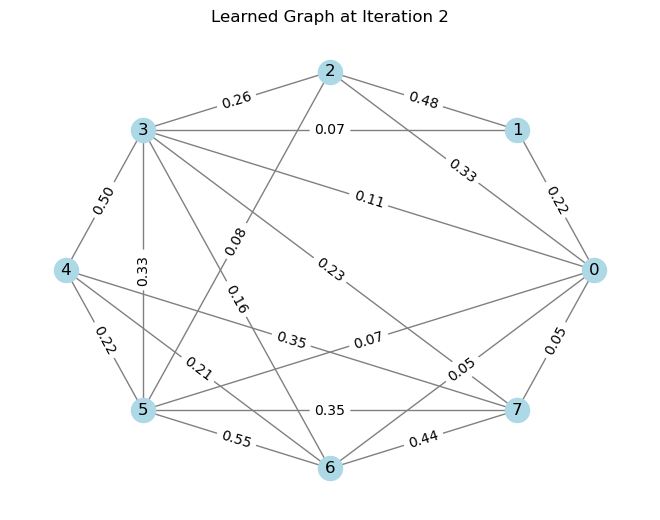

Iteration 3/7
after E-step: delta_W norm 0.1388, GLR 9.0826, adj norm^2 13.4229
after M-step-1: delta_W norm 0.5442, GLR 9.8407, adj norm^2 11.6961
PGD iter 1/50, ||S_new - S||_F = 0.2088
PGD iter 21/50, ||S_new - S||_F = 0.1892
PGD iter 41/50, ||S_new - S||_F = 0.0536
tensor([[0.0000, 0.3869, 0.3882, 0.0499, 0.0000, 0.0303, -0.0000, 0.0000],
        [0.3869, 0.0000, 0.4476, 0.0149, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.3882, 0.4476, 0.0000, 0.2601, 0.0000, 0.0661, -0.0000, -0.0000],
        [0.0499, 0.0149, 0.2601, 0.0000, 0.4810, 0.4039, 0.0867, 0.0780],
        [0.0000, 0.0000, 0.0000, 0.4810, 0.0000, 0.6056, 0.5430, 0.4317],
        [0.0303, 0.0000, 0.0661, 0.4039, 0.6056, 0.0000, 0.4094, 0.3352],
        [-0.0000, -0.0000, -0.0000, 0.0867, 0.5430, 0.4094, 0.0000, 0.4771],
        [0.0000, 0.0000, -0.0000, 0.0780, 0.4317, 0.3352, 0.4771, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.3360, grad_fn=<PowBackward0>)


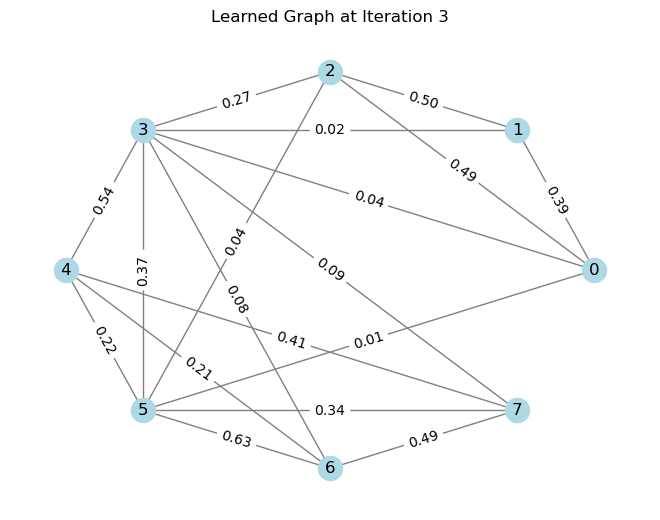

Iteration 4/7
after E-step: delta_W norm 0.4550, GLR 7.2264, adj norm^2 13.2639
after M-step-1: delta_W norm 0.1042, GLR 7.1817, adj norm^2 12.7121
PGD iter 1/50, ||S_new - S||_F = 0.2468
PGD iter 21/50, ||S_new - S||_F = 0.1692
PGD iter 41/50, ||S_new - S||_F = 0.0582
tensor([[0.0000, 0.5097, 0.4584, 0.2167, -0.0000, 0.1461, -0.0000, -0.0000],
        [0.5097, 0.0000, 0.3622, 0.0084, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.4584, 0.3622, 0.0000, 0.1727, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2167, 0.0084, 0.1727, 0.0000, 0.3728, 0.2965, -0.0000, 0.0000],
        [-0.0000, 0.0000, 0.0000, 0.3728, 0.0000, 0.5623, 0.4535, 0.3103],
        [0.1461, 0.0000, 0.0000, 0.2965, 0.5623, 0.0000, 0.3287, 0.1871],
        [-0.0000, -0.0000, -0.0000, -0.0000, 0.4535, 0.3287, 0.0000, 0.3786],
        [-0.0000, 0.0000, 0.0000, 0.0000, 0.3103, 0.1871, 0.3786, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.5803, grad_fn=<PowBackward0>)


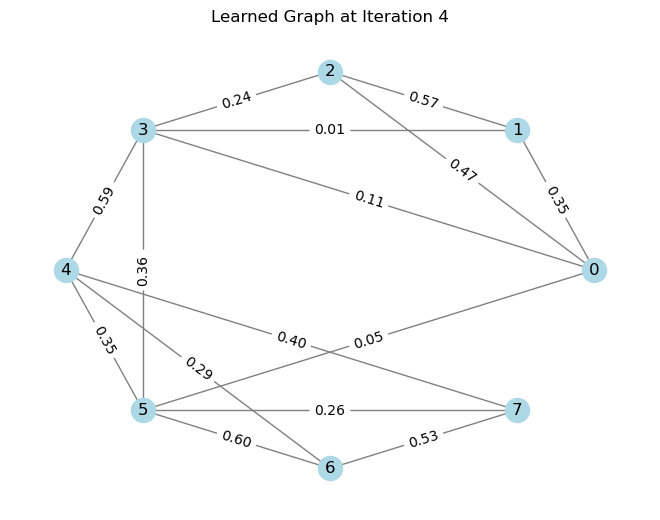

Iteration 5/7
after E-step: delta_W norm 0.1351, GLR 7.2378, adj norm^2 13.1968
after M-step-1: delta_W norm 0.3933, GLR 7.3640, adj norm^2 13.7615
PGD iter 1/50, ||S_new - S||_F = 0.3027
PGD iter 21/50, ||S_new - S||_F = 0.1580
PGD iter 41/50, ||S_new - S||_F = 0.0427
tensor([[0.0000, 0.3403, 0.2919, 0.0177, 0.0000, 0.0100, 0.0000, 0.0000],
        [0.3403, 0.0000, 0.3030, 0.0334, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2919, 0.3030, 0.0000, 0.2089, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0177, 0.0334, 0.2089, 0.0000, 0.3678, 0.2442, -0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.3678, 0.0000, 0.5809, 0.4692, 0.2766],
        [0.0100, 0.0000, 0.0000, 0.2442, 0.5809, 0.0000, 0.2559, 0.1231],
        [0.0000, -0.0000, -0.0000, -0.0000, 0.4692, 0.2559, 0.0000, 0.3323],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2766, 0.1231, 0.3323, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.6607, grad_fn=<PowBackward0>)


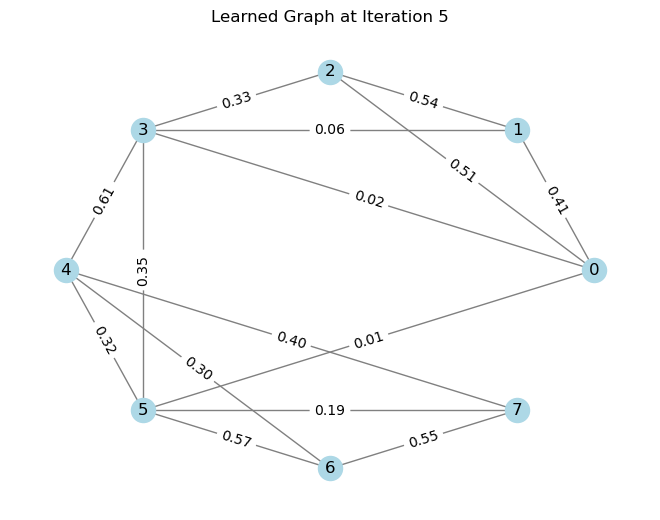

Iteration 6/7
after E-step: delta_W norm 0.3342, GLR 6.8370, adj norm^2 13.1919
after M-step-1: delta_W norm 0.9465, GLR 6.0059, adj norm^2 8.9651
PGD iter 1/50, ||S_new - S||_F = 0.2941
PGD iter 21/50, ||S_new - S||_F = 0.1347
PGD iter 41/50, ||S_new - S||_F = 0.0422
tensor([[0.0000, 0.7157, 0.8243, 0.6336, 0.7714, 0.6049, 0.6040, 0.6123],
        [0.7157, 0.0000, 0.3021, 0.0336, -0.0000, -0.0000, -0.0000, 0.0000],
        [0.8243, 0.3021, 0.0000, 0.1816, 0.0000, 0.0696, -0.0000, 0.0000],
        [0.6336, 0.0336, 0.1816, 0.0000, 0.2250, 0.1622, -0.0000, 0.0119],
        [0.7714, -0.0000, 0.0000, 0.2250, 0.0000, 0.5022, 0.3124, 0.1276],
        [0.6049, -0.0000, 0.0696, 0.1622, 0.5022, 0.0000, 0.2257, 0.0670],
        [0.6040, -0.0000, -0.0000, -0.0000, 0.3124, 0.2257, 0.0000, 0.3418],
        [0.6123, 0.0000, 0.0000, 0.0119, 0.1276, 0.0670, 0.3418, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 6 tensor(4.3181, grad_fn=<PowBackward0>)


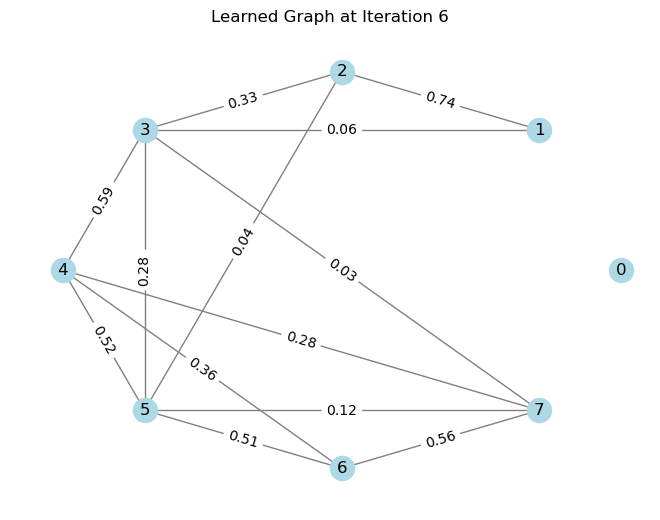

Iteration 7/7
after E-step: delta_W norm 2.3849, GLR 14.8768, adj norm^2 13.1473
after M-step-1: delta_W norm 1.1694, GLR 12.5564, adj norm^2 0.4012
PGD iter 1/50, ||S_new - S||_F = 0.1748
PGD iter 21/50, ||S_new - S||_F = 0.1538
PGD iter 41/50, ||S_new - S||_F = 0.0697
tensor([[0.0000, 0.2633, 0.4319, 0.5695, -0.0000, 0.1160, 0.0000, 0.0116],
        [0.2633, 0.0000, 0.2071, 0.4828, 0.0000, 0.3363, -0.0000, -0.0000],
        [0.4319, 0.2071, 0.0000, 0.5810, 0.0560, 0.5280, 0.4663, 0.4682],
        [0.5695, 0.4828, 0.5810, 0.0000, 0.5830, 0.4673, 0.2536, 0.0000],
        [-0.0000, 0.0000, 0.0560, 0.5830, 0.0000, 0.5907, 0.4726, 0.3635],
        [0.1160, 0.3363, 0.5280, 0.4673, 0.5907, 0.0000, 0.1015, 0.1384],
        [0.0000, -0.0000, 0.4663, 0.2536, 0.4726, 0.1015, 0.0000, 0.4355],
        [0.0116, -0.0000, 0.4682, 0.0000, 0.3635, 0.1384, 0.4355, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 7 tensor(3.1751, grad_fn=<PowBackward0>)


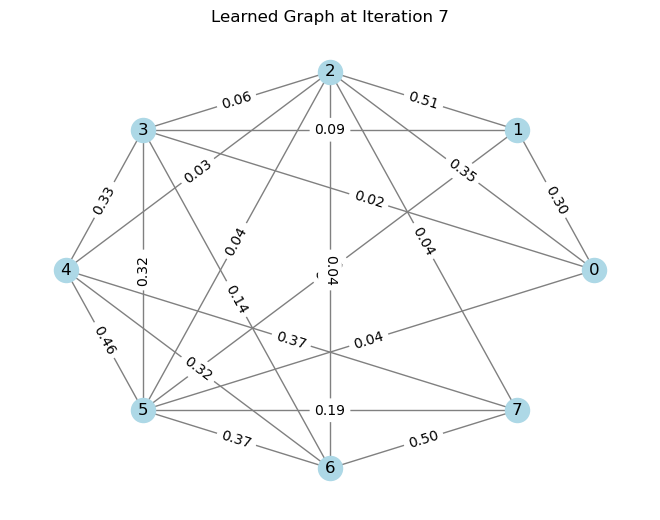

Final learned mask:
tensor([[0.0000, 0.2633, 0.4319, 0.5695, -0.0000, 0.1160, 0.0000, 0.0116],
        [0.2633, 0.0000, 0.2071, 0.4828, 0.0000, 0.3363, -0.0000, -0.0000],
        [0.4319, 0.2071, 0.0000, 0.5810, 0.0560, 0.5280, 0.4663, 0.4682],
        [0.5695, 0.4828, 0.5810, 0.0000, 0.5830, 0.4673, 0.2536, 0.0000],
        [-0.0000, 0.0000, 0.0560, 0.5830, 0.0000, 0.5907, 0.4726, 0.3635],
        [0.1160, 0.3363, 0.5280, 0.4673, 0.5907, 0.0000, 0.1015, 0.1384],
        [0.0000, -0.0000, 0.4663, 0.2536, 0.4726, 0.1015, 0.0000, 0.4355],
        [0.0116, -0.0000, 0.4682, 0.0000, 0.3635, 0.1384, 0.4355, 0.0000]],
       grad_fn=<CopySlices>) tensor(7.1703, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.2975, 0.3463, 0.0247, -0.0000, 0.0370, 0.0000, 0.0036],
        [0.2975, 0.0000, 0.5118, 0.0880, 0.0000, 0.0583, -0.0000, -0.0000],
        [0.3463, 0.5118, 0.0000, 0.0648, 0.0324, 0.0394, 0.0427, 0.0438],
        [0.0247, 0.0880, 0.0648, 0.0000, 0.3255, 0.3171,

In [10]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.3729, GLR 6.4885, adj norm^2 17.3979
after M-step-1: delta_W norm 0.2099, GLR 6.7775, adj norm^2 18.6456
PGD iter 1/50, ||S_new - S||_F = 0.0602
PGD iter 21/50, ||S_new - S||_F = 0.0569
PGD iter 41/50, ||S_new - S||_F = 0.0527
tensor([[0.0000, 0.6770, 0.7144, 0.6034, 0.5423, 0.5860, 0.5688, 0.5404],
        [0.6770, 0.0000, 0.7243, 0.6242, 0.5716, 0.5683, 0.5300, 0.5065],
        [0.7144, 0.7243, 0.0000, 0.6717, 0.6151, 0.6093, 0.5819, 0.5611],
        [0.6034, 0.6242, 0.6717, 0.0000, 0.7286, 0.6933, 0.6486, 0.6793],
        [0.5423, 0.5716, 0.6151, 0.7286, 0.0000, 0.6508, 0.6463, 0.6968],
        [0.5860, 0.5683, 0.6093, 0.6933, 0.6508, 0.0000, 0.7827, 0.7088],
        [0.5688, 0.5300, 0.5819, 0.6486, 0.6463, 0.7827, 0.0000, 0.7237],
        [0.5404, 0.5065, 0.5611, 0.6793, 0.6968, 0.7088, 0.7237, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(3.0446, grad_fn=<PowBackward0>)


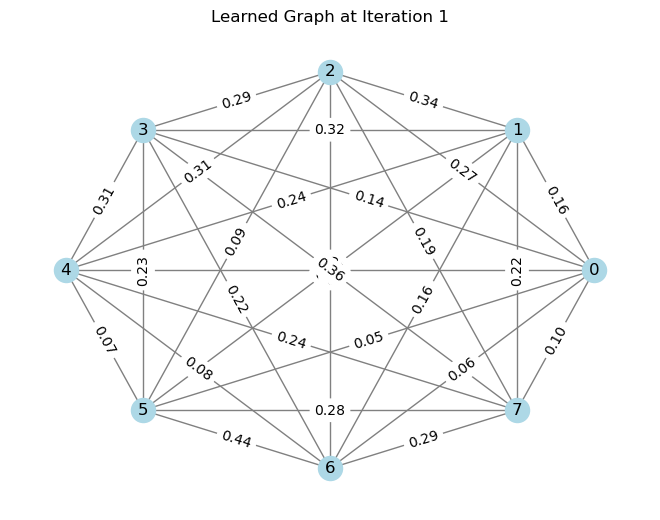

Iteration 2/7
after E-step: delta_W norm 0.1979, GLR 6.4234, adj norm^2 17.3442
after M-step-1: delta_W norm 0.1265, GLR 6.5726, adj norm^2 18.2066
PGD iter 1/50, ||S_new - S||_F = 0.0720
PGD iter 21/50, ||S_new - S||_F = 0.0679
PGD iter 41/50, ||S_new - S||_F = 0.0622
tensor([[0.0000, 0.6576, 0.6891, 0.5585, 0.4551, 0.5399, 0.5106, 0.4740],
        [0.6576, 0.0000, 0.6988, 0.5434, 0.4658, 0.4463, 0.3838, 0.3600],
        [0.6891, 0.6988, 0.0000, 0.6102, 0.4974, 0.5403, 0.4830, 0.4335],
        [0.5585, 0.5434, 0.6102, 0.0000, 0.7111, 0.6470, 0.5752, 0.6200],
        [0.4551, 0.4658, 0.4974, 0.7111, 0.0000, 0.6439, 0.6284, 0.6669],
        [0.5399, 0.4463, 0.5403, 0.6470, 0.6439, 0.0000, 0.7441, 0.6707],
        [0.5106, 0.3838, 0.4830, 0.5752, 0.6284, 0.7441, 0.0000, 0.6907],
        [0.4740, 0.3600, 0.4335, 0.6200, 0.6669, 0.6707, 0.6907, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(5.7677, grad_fn=<PowBackward0>)


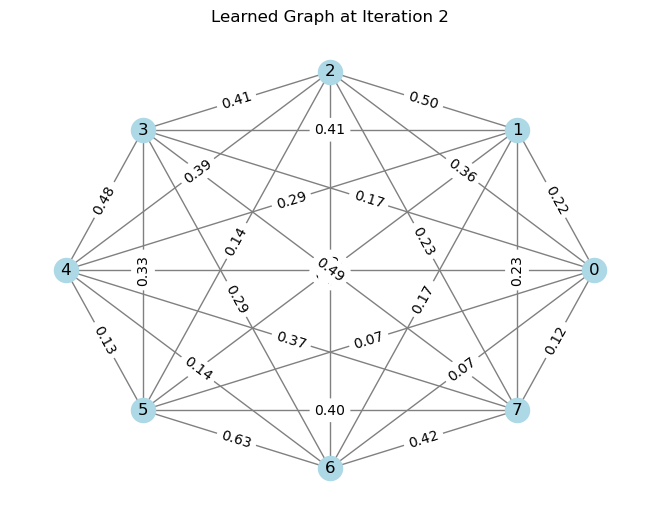

Iteration 3/7
after E-step: delta_W norm 0.1245, GLR 6.4536, adj norm^2 17.1529
after M-step-1: delta_W norm 0.1569, GLR 6.6961, adj norm^2 18.2102
PGD iter 1/50, ||S_new - S||_F = 0.0784
PGD iter 21/50, ||S_new - S||_F = 0.0740
PGD iter 41/50, ||S_new - S||_F = 0.0672
tensor([[0.0000, 0.6468, 0.6721, 0.5286, 0.3922, 0.5095, 0.4731, 0.4322],
        [0.6468, 0.0000, 0.6876, 0.4896, 0.4000, 0.3674, 0.2963, 0.2706],
        [0.6721, 0.6876, 0.0000, 0.5848, 0.4424, 0.5080, 0.4369, 0.3807],
        [0.5286, 0.4896, 0.5848, 0.0000, 0.7068, 0.6371, 0.5563, 0.5988],
        [0.3922, 0.4000, 0.4424, 0.7068, 0.0000, 0.6438, 0.6259, 0.6609],
        [0.5095, 0.3674, 0.5080, 0.6371, 0.6438, 0.0000, 0.7317, 0.6615],
        [0.4731, 0.2963, 0.4369, 0.5563, 0.6259, 0.7317, 0.0000, 0.6852],
        [0.4322, 0.2706, 0.3807, 0.5988, 0.6609, 0.6615, 0.6852, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(6.3963, grad_fn=<PowBackward0>)


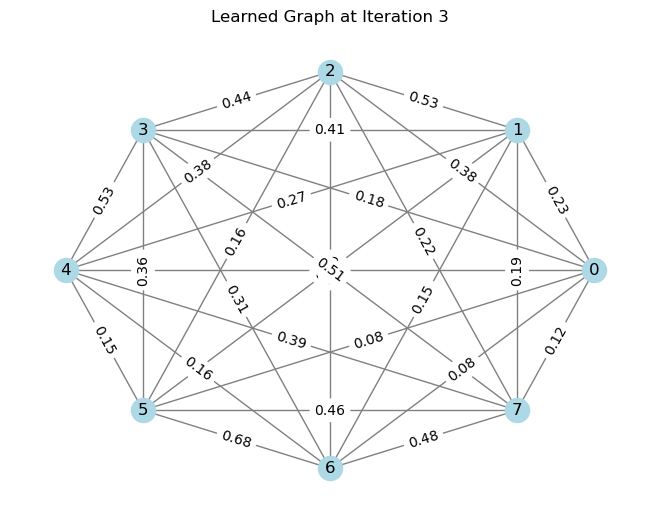

Iteration 4/7
after E-step: delta_W norm 0.1519, GLR 6.3358, adj norm^2 17.0033
after M-step-1: delta_W norm 0.1977, GLR 6.5857, adj norm^2 18.2942
PGD iter 1/50, ||S_new - S||_F = 0.0820
PGD iter 21/50, ||S_new - S||_F = 0.0774
PGD iter 41/50, ||S_new - S||_F = 0.0700
tensor([[0.0000, 0.6383, 0.6584, 0.4978, 0.3213, 0.5006, 0.4531, 0.3669],
        [0.6383, 0.0000, 0.6799, 0.4505, 0.3353, 0.3677, 0.2773, 0.1991],
        [0.6584, 0.6799, 0.0000, 0.5779, 0.4126, 0.5220, 0.4472, 0.3476],
        [0.4978, 0.4505, 0.5779, 0.0000, 0.7012, 0.6407, 0.5517, 0.5820],
        [0.3213, 0.3353, 0.4126, 0.7012, 0.0000, 0.6422, 0.6256, 0.6581],
        [0.5006, 0.3677, 0.5220, 0.6407, 0.6422, 0.0000, 0.7379, 0.6633],
        [0.4531, 0.2773, 0.4472, 0.5517, 0.6256, 0.7379, 0.0000, 0.6863],
        [0.3669, 0.1991, 0.3476, 0.5820, 0.6581, 0.6633, 0.6863, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(6.6797, grad_fn=<PowBackward0>)


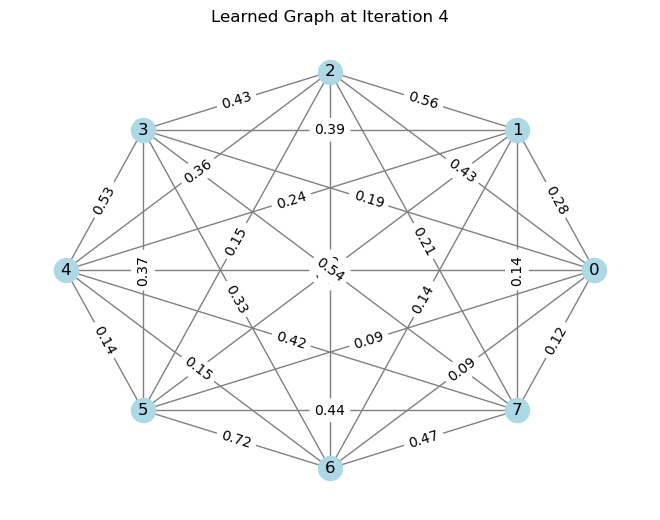

Iteration 5/7
after E-step: delta_W norm 0.1905, GLR 6.3071, adj norm^2 16.8781
after M-step-1: delta_W norm 0.1786, GLR 6.5498, adj norm^2 17.9469
PGD iter 1/50, ||S_new - S||_F = 0.0848
PGD iter 21/50, ||S_new - S||_F = 0.0800
PGD iter 41/50, ||S_new - S||_F = 0.0721
tensor([[0.0000, 0.6454, 0.6692, 0.5017, 0.3272, 0.4891, 0.4447, 0.3768],
        [0.6454, 0.0000, 0.6771, 0.4220, 0.3001, 0.3131, 0.2293, 0.1631],
        [0.6692, 0.6771, 0.0000, 0.5576, 0.3755, 0.4908, 0.4117, 0.3181],
        [0.5017, 0.4220, 0.5576, 0.0000, 0.6994, 0.6336, 0.5478, 0.5774],
        [0.3272, 0.3001, 0.3755, 0.6994, 0.0000, 0.6429, 0.6244, 0.6553],
        [0.4891, 0.3131, 0.4908, 0.6336, 0.6429, 0.0000, 0.7326, 0.6562],
        [0.4447, 0.2293, 0.4117, 0.5478, 0.6244, 0.7326, 0.0000, 0.6829],
        [0.3768, 0.1631, 0.3181, 0.5774, 0.6553, 0.6562, 0.6829, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(6.7478, grad_fn=<PowBackward0>)


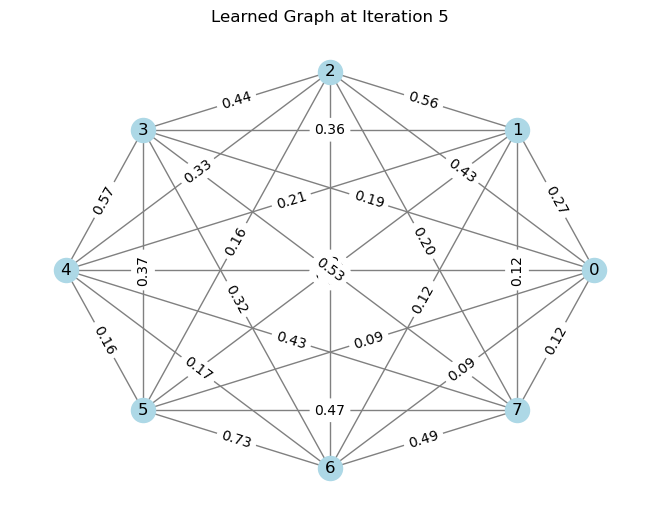

Iteration 6/7
after E-step: delta_W norm 0.1792, GLR 6.2528, adj norm^2 16.7593
after M-step-1: delta_W norm 0.1131, GLR 6.3426, adj norm^2 17.4669
PGD iter 1/50, ||S_new - S||_F = 0.0864
PGD iter 21/50, ||S_new - S||_F = 0.0814
PGD iter 41/50, ||S_new - S||_F = 0.0731
tensor([[0.0000, 0.6506, 0.6798, 0.5260, 0.3598, 0.5106, 0.4703, 0.4181],
        [0.6506, 0.0000, 0.6722, 0.3910, 0.2572, 0.2764, 0.1862, 0.1178],
        [0.6798, 0.6722, 0.0000, 0.5489, 0.3475, 0.4800, 0.3935, 0.2968],
        [0.5260, 0.3910, 0.5489, 0.0000, 0.6984, 0.6325, 0.5410, 0.5686],
        [0.3598, 0.2572, 0.3475, 0.6984, 0.0000, 0.6442, 0.6248, 0.6541],
        [0.5106, 0.2764, 0.4800, 0.6325, 0.6442, 0.0000, 0.7297, 0.6553],
        [0.4703, 0.1862, 0.3935, 0.5410, 0.6248, 0.7297, 0.0000, 0.6837],
        [0.4181, 0.1178, 0.2968, 0.5686, 0.6541, 0.6553, 0.6837, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 6 tensor(6.8216, grad_fn=<PowBackward0>)


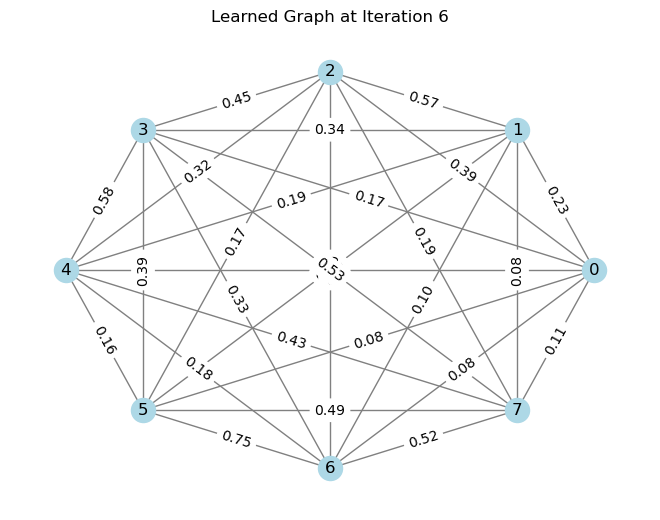

Iteration 7/7
after E-step: delta_W norm 0.1096, GLR 6.3231, adj norm^2 16.6416
after M-step-1: delta_W norm 0.1128, GLR 6.3925, adj norm^2 17.4401
PGD iter 1/50, ||S_new - S||_F = 0.0891
PGD iter 21/50, ||S_new - S||_F = 0.0839
PGD iter 41/50, ||S_new - S||_F = 0.0748
tensor([[0.0000, 0.6399, 0.6623, 0.4986, 0.2918, 0.5085, 0.4585, 0.3591],
        [0.6399, 0.0000, 0.6651, 0.3554, 0.1975, 0.3046, 0.1896, 0.0504],
        [0.6623, 0.6651, 0.0000, 0.5484, 0.3343, 0.5073, 0.4199, 0.2705],
        [0.4986, 0.3554, 0.5484, 0.0000, 0.6971, 0.6390, 0.5393, 0.5595],
        [0.2918, 0.1975, 0.3343, 0.6971, 0.0000, 0.6416, 0.6254, 0.6559],
        [0.5085, 0.3046, 0.5073, 0.6390, 0.6416, 0.0000, 0.7398, 0.6604],
        [0.4585, 0.1896, 0.4199, 0.5393, 0.6254, 0.7398, 0.0000, 0.6861],
        [0.3591, 0.0504, 0.2705, 0.5595, 0.6559, 0.6604, 0.6861, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 7 tensor(6.8461, grad_fn=<PowBackward0>)


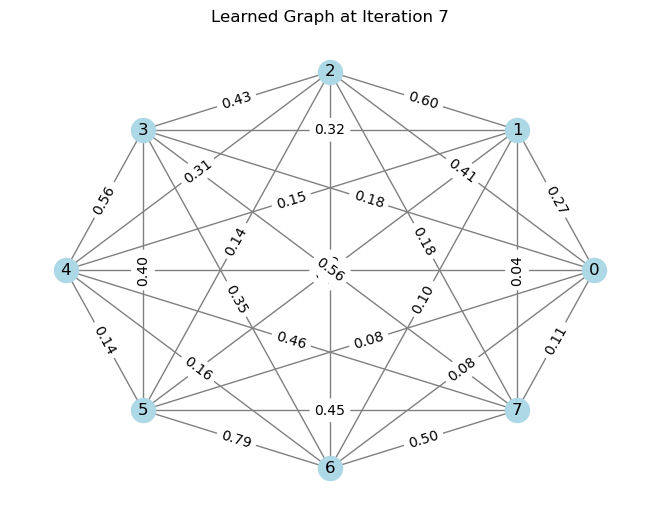

Final learned mask:
tensor([[0.0000, 0.6399, 0.6623, 0.4986, 0.2918, 0.5085, 0.4585, 0.3591],
        [0.6399, 0.0000, 0.6651, 0.3554, 0.1975, 0.3046, 0.1896, 0.0504],
        [0.6623, 0.6651, 0.0000, 0.5484, 0.3343, 0.5073, 0.4199, 0.2705],
        [0.4986, 0.3554, 0.5484, 0.0000, 0.6971, 0.6390, 0.5393, 0.5595],
        [0.2918, 0.1975, 0.3343, 0.6971, 0.0000, 0.6416, 0.6254, 0.6559],
        [0.5085, 0.3046, 0.5073, 0.6390, 0.6416, 0.0000, 0.7398, 0.6604],
        [0.4585, 0.1896, 0.4199, 0.5393, 0.6254, 0.7398, 0.0000, 0.6861],
        [0.3591, 0.0504, 0.2705, 0.5595, 0.6559, 0.6604, 0.6861, 0.0000]],
       grad_fn=<CopySlices>) tensor(15.2472, grad_fn=<PowBackward0>)
Final learned adjacency matrix:
tensor([[0.0000, 0.2660, 0.4110, 0.1751, 0.1613, 0.0751, 0.0795, 0.1107],
        [0.2660, 0.0000, 0.6004, 0.3160, 0.1523, 0.1443, 0.0964, 0.0376],
        [0.4110, 0.6004, 0.0000, 0.4291, 0.3132, 0.1408, 0.1392, 0.1783],
        [0.1751, 0.3160, 0.4291, 0.0000, 0.5559, 0.3974, 0.3517,

In [11]:
arg_dict = {
    'mu': 0.4,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.1367, GLR 16.8665, adj norm^2 14.3648
after M-step-1: delta_W norm 0.3085, GLR 15.4335, adj norm^2 13.0511
PGD iter 1/50, ||S_new - S||_F = 0.1713
PGD iter 21/50, ||S_new - S||_F = 0.1435
PGD iter 41/50, ||S_new - S||_F = 0.0649
tensor([[0.0000, 0.4652, 0.5490, 0.2473, 0.1461, 0.1866, 0.1524, 0.1339],
        [0.4652, 0.0000, 0.5568, 0.2119, 0.0092, 0.0320, 0.0000, 0.0000],
        [0.5490, 0.5568, 0.0000, 0.3308, 0.0845, 0.1547, 0.0192, 0.0000],
        [0.2473, 0.2119, 0.3308, 0.0000, 0.5013, 0.3751, 0.1588, 0.2382],
        [0.1461, 0.0092, 0.0845, 0.5013, 0.0000, 0.3758, 0.3406, 0.4313],
        [0.1866, 0.0320, 0.1547, 0.3751, 0.3758, 0.0000, 0.5236, 0.3617],
        [0.1524, 0.0000, 0.0192, 0.1588, 0.3406, 0.5236, 0.0000, 0.4706],
        [0.1339, 0.0000, 0.0000, 0.2382, 0.4313, 0.3617, 0.4706, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.8841, grad_fn=<PowBackward0>)


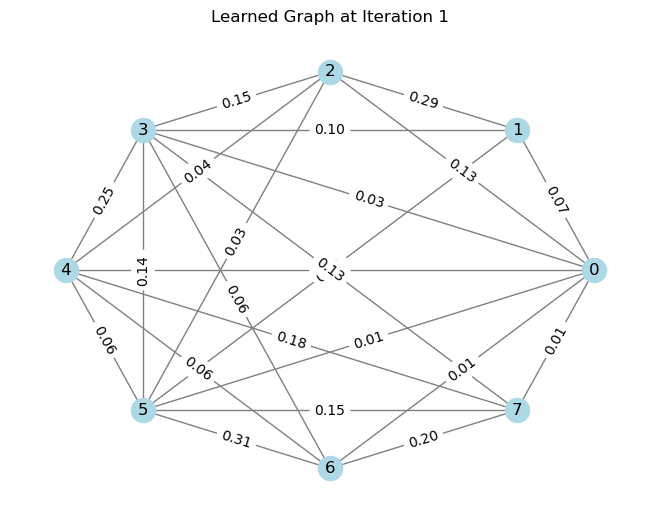

Iteration 2/7
after E-step: delta_W norm 0.2904, GLR 9.9318, adj norm^2 13.5032
after M-step-1: delta_W norm 0.4007, GLR 10.5388, adj norm^2 13.1197
PGD iter 1/50, ||S_new - S||_F = 0.4311
PGD iter 21/50, ||S_new - S||_F = 0.1057
PGD iter 41/50, ||S_new - S||_F = 0.0202
tensor([[0.0000, 0.2788, 0.2989, 0.0203, 0.0094, 0.0000, 0.0000, 0.0000],
        [0.2788, 0.0000, 0.3454, 0.0741, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2989, 0.3454, 0.0000, 0.2852, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0203, 0.0741, 0.2852, 0.0000, 0.3770, 0.2529, 0.0000, 0.0741],
        [0.0094, 0.0000, 0.0000, 0.3770, 0.0000, 0.3574, 0.2247, 0.2641],
        [0.0000, 0.0000, 0.0000, 0.2529, 0.3574, 0.0000, 0.3270, 0.1157],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2247, 0.3270, 0.0000, 0.3231],
        [0.0000, 0.0000, 0.0000, 0.0741, 0.2641, 0.1157, 0.3231, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.7045, grad_fn=<PowBackward0>)


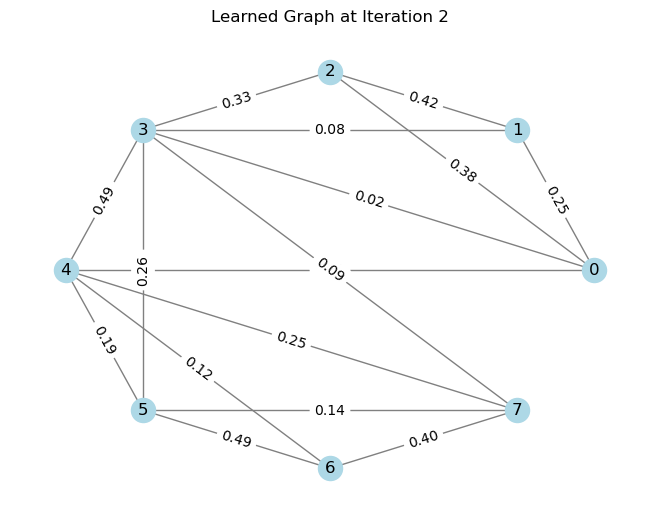

Iteration 3/7
after E-step: delta_W norm 0.3379, GLR 7.1398, adj norm^2 13.2620
after M-step-1: delta_W norm 0.0909, GLR 7.1723, adj norm^2 13.3972
PGD iter 1/50, ||S_new - S||_F = 0.6724
PGD iter 21/50, ||S_new - S||_F = 0.0739
PGD iter 41/50, ||S_new - S||_F = 0.0160
tensor([[0.0000, 0.2461, 0.2788, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2461, 0.0000, 0.2221, 0.0401, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2788, 0.2221, 0.0000, 0.2051, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0401, 0.2051, 0.0000, 0.2618, 0.1672, 0.0000, 0.0448],
        [0.0000, 0.0000, 0.0000, 0.2618, 0.0000, 0.3450, 0.1237, 0.1693],
        [0.0000, 0.0000, 0.0000, 0.1672, 0.3450, 0.0000, 0.2324, 0.0473],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1237, 0.2324, 0.0000, 0.2535],
        [0.0000, 0.0000, 0.0000, 0.0448, 0.1693, 0.0473, 0.2535, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.6770, grad_fn=<PowBackward0>)


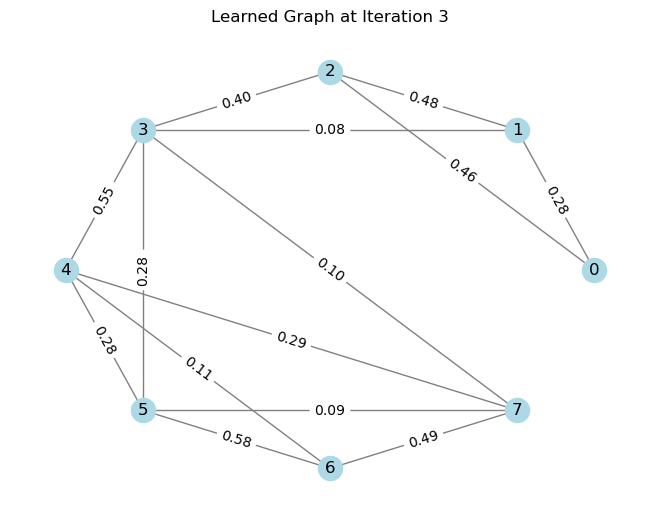

Iteration 4/7
after E-step: delta_W norm 0.1059, GLR 6.9179, adj norm^2 13.2223
after M-step-1: delta_W norm 0.0399, GLR 6.9208, adj norm^2 13.2890
PGD iter 1/50, ||S_new - S||_F = 0.9117
PGD iter 21/50, ||S_new - S||_F = 0.0481
PGD iter 41/50, ||S_new - S||_F = 0.0140
tensor([[0.0000, 0.1970, 0.2357, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1970, 0.0000, 0.1765, 0.0232, -0.0000, 0.0000, -0.0000, 0.0000],
        [0.2357, 0.1765, 0.0000, 0.1592, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0232, 0.1592, 0.0000, 0.2047, 0.1299, -0.0000, 0.0278],
        [0.0000, -0.0000, 0.0000, 0.2047, 0.0000, 0.3211, 0.0470, 0.1451],
        [0.0000, 0.0000, 0.0000, 0.1299, 0.3211, 0.0000, 0.1904, 0.0176],
        [0.0000, -0.0000, -0.0000, -0.0000, 0.0470, 0.1904, 0.0000, 0.2125],
        [0.0000, 0.0000, -0.0000, 0.0278, 0.1451, 0.0176, 0.2125, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.6005, grad_fn=<PowBackward0>)


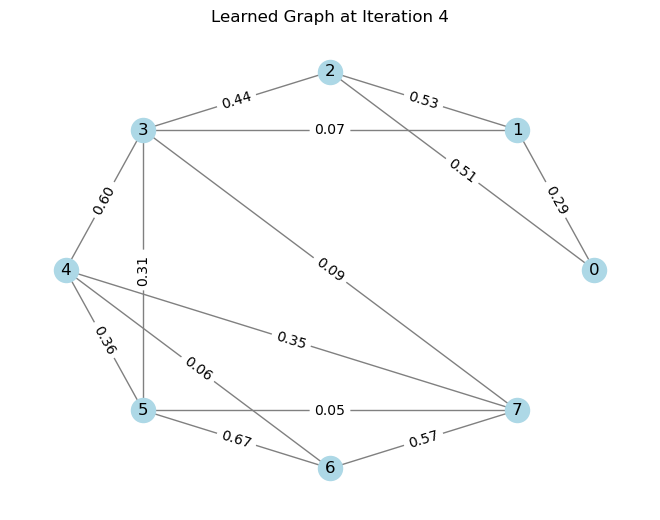

Iteration 5/7
after E-step: delta_W norm 0.0414, GLR 6.6682, adj norm^2 13.1855
after M-step-1: delta_W norm 0.0452, GLR 6.6736, adj norm^2 13.2469
PGD iter 1/50, ||S_new - S||_F = 1.1165
PGD iter 21/50, ||S_new - S||_F = 0.0459
PGD iter 41/50, ||S_new - S||_F = 0.5406
tensor([[0.0000, 0.1386, 0.1791, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1386, 0.0000, 0.1160, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1791, 0.1160, 0.0000, 0.0666, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0666, 0.0000, 0.1459, 0.0870, 0.0000, 0.0120],
        [0.0000, 0.0000, 0.0000, 0.1459, 0.0000, 0.2807, 0.0003, 0.1094],
        [0.0000, 0.0000, 0.0000, 0.0870, 0.2807, 0.0000, 0.1507, 0.0032],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0003, 0.1507, 0.0000, 0.1631],
        [0.0000, 0.0000, 0.0000, 0.0120, 0.1094, 0.0032, 0.1631, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(3.6690, grad_fn=<PowBackward0>)


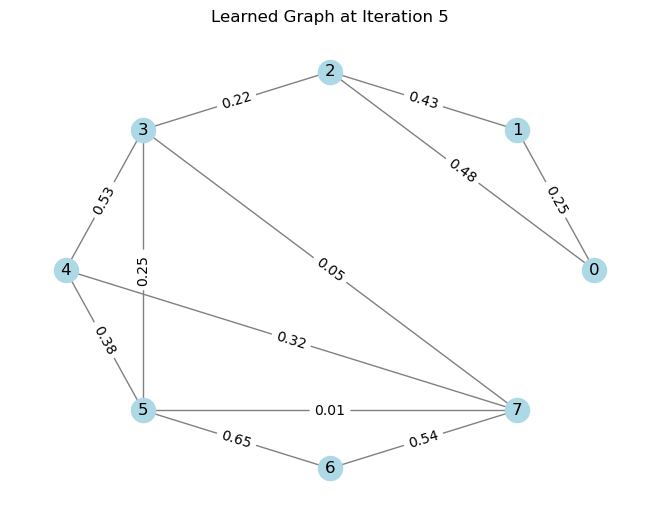

Iteration 6/7
after E-step: delta_W norm 0.0453, GLR 5.9908, adj norm^2 13.1011
after M-step-1: delta_W norm 2.6458, GLR 0.0000, adj norm^2 0.0000


_LinAlgError: linalg.inv: The diagonal element 2 is zero, the inversion could not be completed because the input matrix is singular.

In [12]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/7
after E-step: delta_W norm 0.1367, GLR 16.8665, adj norm^2 14.3648
after M-step-1: delta_W norm 0.3085, GLR 15.4335, adj norm^2 13.0511
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.1701
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0285
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0092
tensor([[0.0000, 1.0000, 1.0000, 0.8921, 1.0000, 0.7991, 0.8756, 0.8914],
        [1.0000, 0.0000, 0.7306, 0.6217, 0.4706, 0.8771, 0.7974, 0.6108],
        [1.0000, 0.7306, 0.0000, 0.7647, 0.5012, 0.8631, 0.8239, 0.6960],
        [0.8921, 0.6217, 0.7647, 0.0000, 0.7754, 0.8661, 0.6862, 0.5301],
        [1.0000, 0.4706, 0.5012, 0.7754, 0.0000, 0.8355, 0.8381, 0.8704],
        [0.7991, 0.8771, 0.8631, 0.8661, 0.8355, 0.0000, 0.7411, 0.7177],
        [0.8756, 0.7974, 0.8239, 0.6862, 0.8381, 0.7411, 0.0000, 0.8039],
        [0.8914, 0.6108, 0.6960, 0.5301, 0.8704, 0.7177, 0.8039, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 1 tensor(3.6156, grad_fn=<

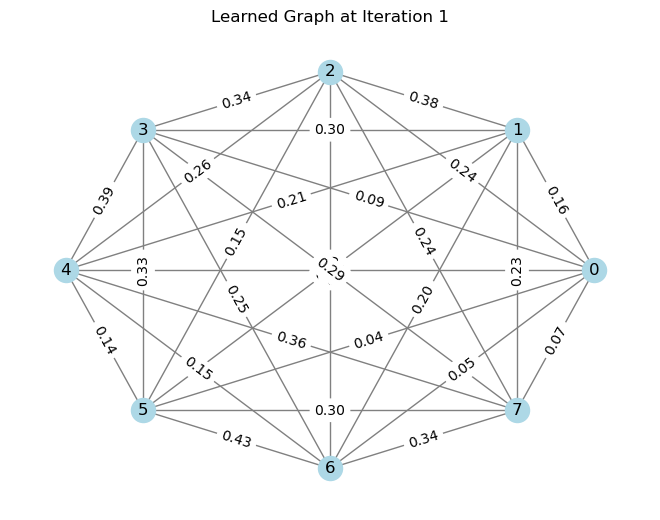

Iteration 2/7
after E-step: delta_W norm 0.3704, GLR 17.4988, adj norm^2 14.2565
after M-step-1: delta_W norm 0.0627, GLR 17.5902, adj norm^2 13.9732
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2182
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0359
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0083
tensor([[0.0000, 0.8273, 0.8662, 0.7471, 0.7524, 0.8074, 0.8302, 0.7499],
        [0.8273, 0.0000, 0.6568, 0.4670, 0.4027, 0.6444, 0.6203, 0.4939],
        [0.8662, 0.6568, 0.0000, 0.5981, 0.4191, 0.7165, 0.6601, 0.5355],
        [0.7471, 0.4670, 0.5981, 0.0000, 0.6962, 0.7245, 0.5538, 0.4484],
        [0.7524, 0.4027, 0.4191, 0.6962, 0.0000, 0.7221, 0.7537, 0.7903],
        [0.8074, 0.6444, 0.7165, 0.7245, 0.7221, 0.0000, 0.6629, 0.5823],
        [0.8302, 0.6203, 0.6601, 0.5538, 0.7537, 0.6629, 0.0000, 0.7207],
        [0.7499, 0.4939, 0.5355, 0.4484, 0.7903, 0.5823, 0.7207, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 2 tensor(4.9640, grad_fn=<

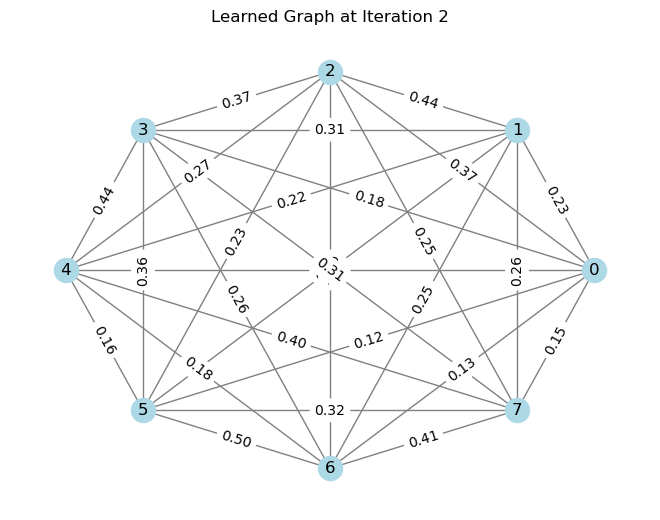

Iteration 3/7
after E-step: delta_W norm 0.0661, GLR 16.7193, adj norm^2 14.2597
after M-step-1: delta_W norm 0.2958, GLR 16.2286, adj norm^2 13.7017
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2357
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0464
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0133
tensor([[0.0000, 0.7313, 0.7212, 0.6860, 0.5903, 0.7820, 0.7929, 0.6838],
        [0.7313, 0.0000, 0.5716, 0.3984, 0.2801, 0.7326, 0.6600, 0.3803],
        [0.7212, 0.5716, 0.0000, 0.5996, 0.3494, 0.7243, 0.6898, 0.4837],
        [0.6860, 0.3984, 0.5996, 0.0000, 0.6245, 0.7551, 0.4832, 0.2279],
        [0.5903, 0.2801, 0.3494, 0.6245, 0.0000, 0.7037, 0.7254, 0.7076],
        [0.7820, 0.7326, 0.7243, 0.7551, 0.7037, 0.0000, 0.5617, 0.5466],
        [0.7929, 0.6600, 0.6898, 0.4832, 0.7254, 0.5617, 0.0000, 0.6964],
        [0.6838, 0.3803, 0.4837, 0.2279, 0.7076, 0.5466, 0.6964, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 3 tensor(5.4965, grad_fn=<

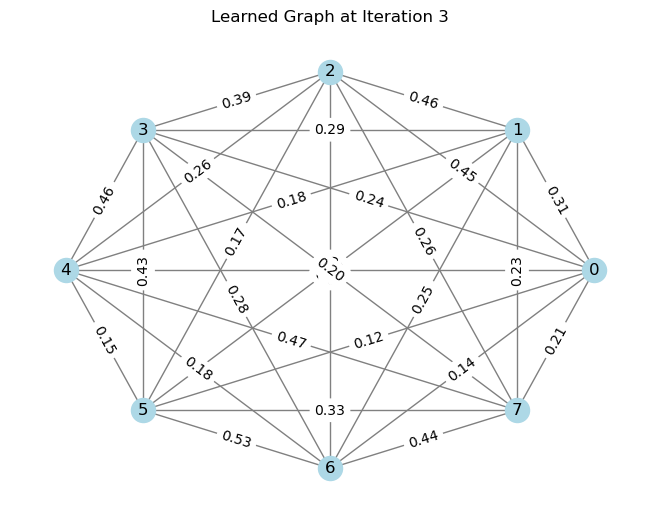

Iteration 4/7
after E-step: delta_W norm 0.3150, GLR 17.0006, adj norm^2 14.1776
after M-step-1: delta_W norm 0.9667, GLR 14.1504, adj norm^2 12.9930
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2552
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0785
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0624
tensor([[0.0000, 0.2639, 0.2599, 0.2115, 0.1921, 0.2045, 0.1633, 0.2162],
        [0.2639, 0.0000, 0.5913, 0.3430, 0.2514, 0.6237, 0.6254, 0.3946],
        [0.2599, 0.5913, 0.0000, 0.4984, 0.2459, 0.6759, 0.6189, 0.3932],
        [0.2115, 0.3430, 0.4984, 0.0000, 0.5591, 0.6920, 0.4712, 0.2753],
        [0.1921, 0.2514, 0.2459, 0.5591, 0.0000, 0.7239, 0.7572, 0.6323],
        [0.2045, 0.6237, 0.6759, 0.6920, 0.7239, 0.0000, 0.6073, 0.5111],
        [0.1633, 0.6254, 0.6189, 0.4712, 0.7572, 0.6073, 0.0000, 0.7061],
        [0.2162, 0.3946, 0.3932, 0.2753, 0.6323, 0.5111, 0.7061, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 4 tensor(6.2028, grad_fn=<

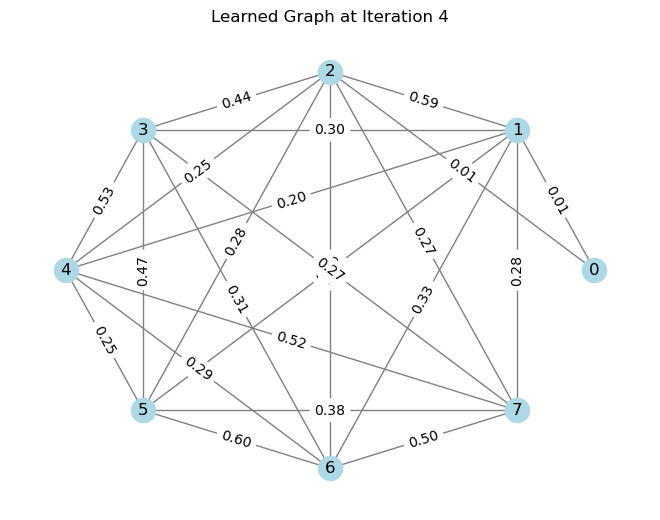

Iteration 5/7
after E-step: delta_W norm 0.3916, GLR 15.0879, adj norm^2 14.0679
after M-step-1: delta_W norm 1.3444, GLR 12.4242, adj norm^2 2.8431
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2481
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0706
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0629
tensor([[0.0000, 0.2007, 0.1981, 0.1999, 0.1934, 0.1999, 0.2000, 0.2000],
        [0.2007, 0.0000, 0.7050, 0.2771, 0.5489, 0.4164, 0.7325, 0.5386],
        [0.1981, 0.7050, 0.0000, 0.5326, 0.3674, 0.3410, 0.7190, 0.5550],
        [0.1999, 0.2771, 0.5326, 0.0000, 0.7334, 0.3191, 0.6264, 0.4846],
        [0.1934, 0.5489, 0.3674, 0.7334, 0.0000, 0.5419, 0.6524, 0.7914],
        [0.1999, 0.4164, 0.3410, 0.3191, 0.5419, 0.0000, 0.8281, 0.8500],
        [0.2000, 0.7325, 0.7190, 0.6264, 0.6524, 0.8281, 0.0000, 0.8676],
        [0.2000, 0.5386, 0.5550, 0.4846, 0.7914, 0.8500, 0.8676, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 5 tensor(7.3077, grad_fn=<P

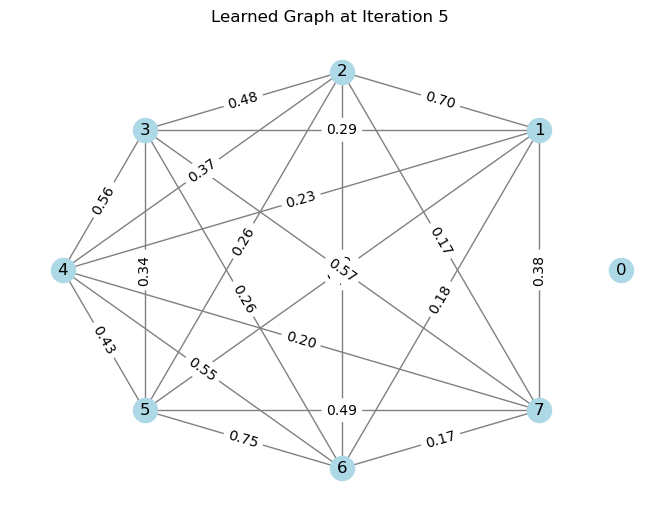

Iteration 6/7
after E-step: delta_W norm 1.1890, GLR 14.6756, adj norm^2 14.0269
after M-step-1: delta_W norm 2.6193, GLR 2.1857, adj norm^2 0.0000
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.1284
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.1760
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.1153
tensor([[0.0000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2145],
        [0.2000, 0.0000, 0.0000, 0.2001, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2001, 0.0000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.2000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.2000],
        [0.2000, 0.2145, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 6 tensor(5.2092e-08, grad_fn

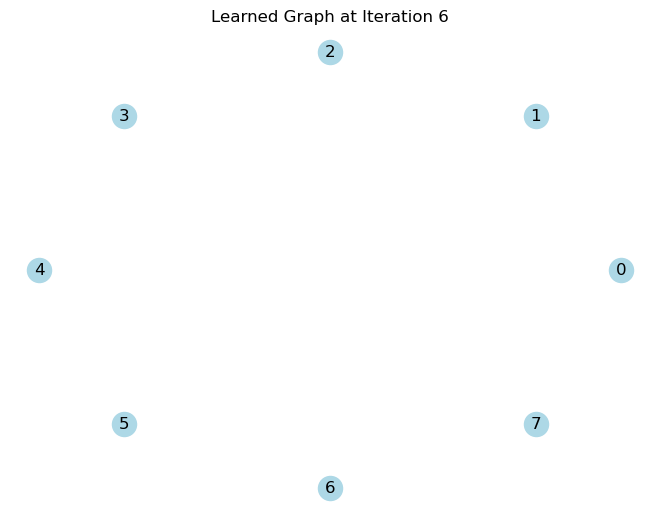

Iteration 7/7
after E-step: delta_W norm 3.1995, GLR 23.7314, adj norm^2 12.9669
after M-step-1: delta_W norm 2.6458, GLR 0.0000, adj norm^2 0.0000


_LinAlgError: linalg.inv: The diagonal element 2 is zero, the inversion could not be completed because the input matrix is singular.

In [13]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 7,
    'PGD_iters': 100,
    'use_block_coordinate': True,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)